# Principal Component Analysis

### Cambio de bases ortogonales

Supongamos tenemos los siguientes puntos en un espacio vectorial euclideo:

\\[
\vec{p}_1=\begin{bmatrix}
1\\ 
1
\end{bmatrix}
\;\;\;\;
\vec{p}_2=\begin{bmatrix}
-1\\ 
1
\end{bmatrix}
\;\;\;\;
\vec{p}_3=\begin{bmatrix}
0\\ 
-1
\end{bmatrix}
\;\;\;\;
\vec{p}_4=\begin{bmatrix}
1\\ 
0
\end{bmatrix}
\\]

Estos vectores los podemos agrupar en una matrix $X$:
\\[
X=\begin{bmatrix}
{\vec{p}_1}^\intercal\\ 
{\vec{p}_2}^\intercal\\ 
{\vec{p}_3}^\intercal\\ 
{\vec{p}_4}^\intercal
\end{bmatrix}=
\begin{bmatrix}
1&1\\ 
-1&1\\ 
0&-1\\ 
1&0
\end{bmatrix}
\\]

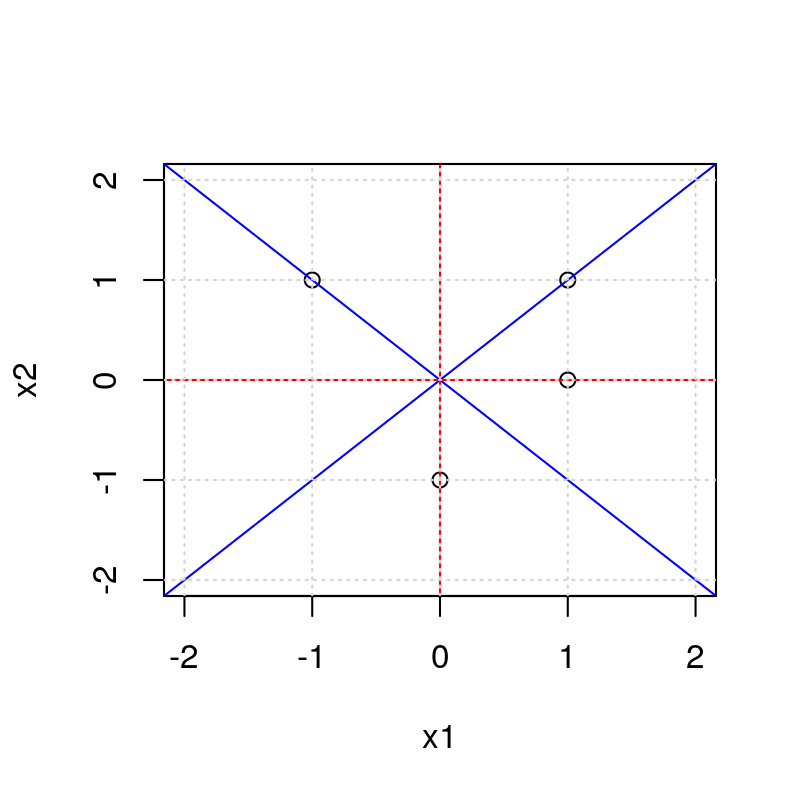

In [1]:
options(repr.plot.height=1,repr.plot.width=8,repr.plot.res = 200)

p1<-matrix(c(1,1),ncol=1)
p2<-matrix(c(-1,1),ncol=1)
p3<-matrix(c(0,-1),ncol=1)
p4<-matrix(c(1,0),ncol=1)
X<-rbind(t(p1),t(p2),t(p3),t(p4))
options(repr.plot.height=4,repr.plot.width=4)
plot(X[,1],X[,2],xlim=c(-2,2),ylim = c(-2,2),xlab="x1",ylab="x2")
abline(c(0,1),col="blue")
abline(c(0,-1),col="blue")
abline(h=0,col="red")
abline(v=0,col="red")
grid()

Pero queremos cambiar el eje, queremos realizar una transformación lineal del espacio vectorial.
Nuestro nuevo espacio vectorial vendrá dado por los vectores ortonormales:
\\[
\vec{u}_1=\begin{bmatrix}
\frac{1}{\sqrt{2}}\\ 
\frac{1}{\sqrt{2}}
\end{bmatrix}
\;\;\;\;
\vec{u}_2=\begin{bmatrix}
\frac{-1}{\sqrt{2}}\\ 
\frac{1}{\sqrt{2}}
\end{bmatrix}
\\]

In [2]:
u1<-matrix(c( 1/sqrt(2),1/sqrt(2)),ncol=1)
u2<-matrix(c(-1/sqrt(2),1/sqrt(2)),ncol=1)
paste("Son normales porque su norma es ",sum(u1^2))
paste("Son ortogonales porque su producto escalar es ",t(u1) %*% u2)

[1] "Son normales porque su norma es  1"

[1] "Son ortogonales porque su producto escalar es  0"

Los puntos $p_x$ de nuestro espacio se pueden representar mediante una combinación lineal de los vectores $\vec{u}_1$ y $\vec{u}_2$.

\\[
\vec{p}= \sum_i \alpha_i \vec{u}_i
\\]

\\[
\vec{p}_1=\begin{bmatrix}
1\\ 
1
\end{bmatrix}= \sqrt{2}·\vec{u}_1 +  0·\vec{u}_2
\\]
\\[
\vec{p}_2=\begin{bmatrix} 
-1\\ 
1
\end{bmatrix}= 0·\vec{u}_1 +  \sqrt{2}·\vec{u}_2
\\]
\\[
\vec{p}_3=\begin{bmatrix}
0\\ 
-1
\end{bmatrix}= \frac{-1}{\sqrt{2}}·\vec{u}_1 + \frac{-1}{\sqrt{2}}·\vec{u}_2
\\]
\\[
\vec{p}_4=\begin{bmatrix}
1\\ 
0
\end{bmatrix}= \frac{1}{\sqrt{2}}·\vec{u}_1 - \frac{1}{\sqrt{2}}·\vec{u}_2
\\]

Esto nos origina otra matriz con referencia al espacio vectorial $\vec{u_x}$ tal que:
\\[
U=\begin{bmatrix}
\sqrt{2}&0\\ 
0&\sqrt{2}\\ 
\frac{-1}{\sqrt{2}}&\frac{-1}{\sqrt{2}}\\ 
\frac{1}{\sqrt{2}}&\frac{-1}{\sqrt{2}}
\end{bmatrix}
=
\begin{bmatrix}
1&1\\ 
-1&1\\ 
0&-1\\ 
1&0
\end{bmatrix}·
\begin{bmatrix}
\frac{1}{\sqrt{2}}&\frac{-1}{\sqrt{2}}\\ 
\frac{1}{\sqrt{2}}&\frac{1}{\sqrt{2}}
\end{bmatrix}
\\]

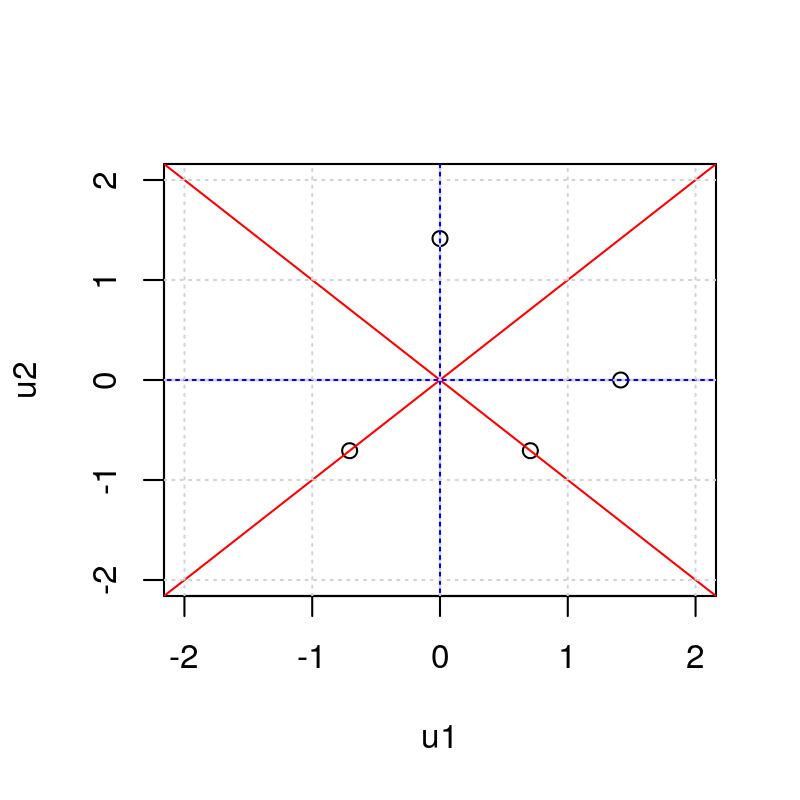

In [4]:
U <- X %*% cbind(u1, u2) 
plot(U[,1],U[,2],xlim=c(-2,2),ylim = c(-2,2),xlab="u1",ylab="u2")
abline(c(0,1),col="red")
abline(c(0,-1),col="red")
abline(h=0,col="blue")
abline(v=0,col="blue")
grid()

In [6]:
cbind(u1, u2) %*% solve(cbind(u1, u2))

1.000000e+00,1.014654e-17
1.014654e-17,1.000000e+00


In [5]:
paste("Si queremos recuperar la variable X original:")
U %*% solve(cbind(u1, u2))

[1] "Si queremos recuperar la variable X original:"

1.000000e+00,1.000000e+00
-1.000000e+00,1.000000e+00
-1.014654e-17,-1.000000e+00
1.000000e+00,1.014654e-17


### Distribución de los datos

Los datos no se distribuyen igual entre todas las dimensiones.

Nos interesa encontrar la dirección de máxima variabilidad de los datos para, sobre esa dirección (vector), proyectar nuestros datos.
\\[
\vec{p}= \sum_i \alpha_i \vec{u}_i
\\]

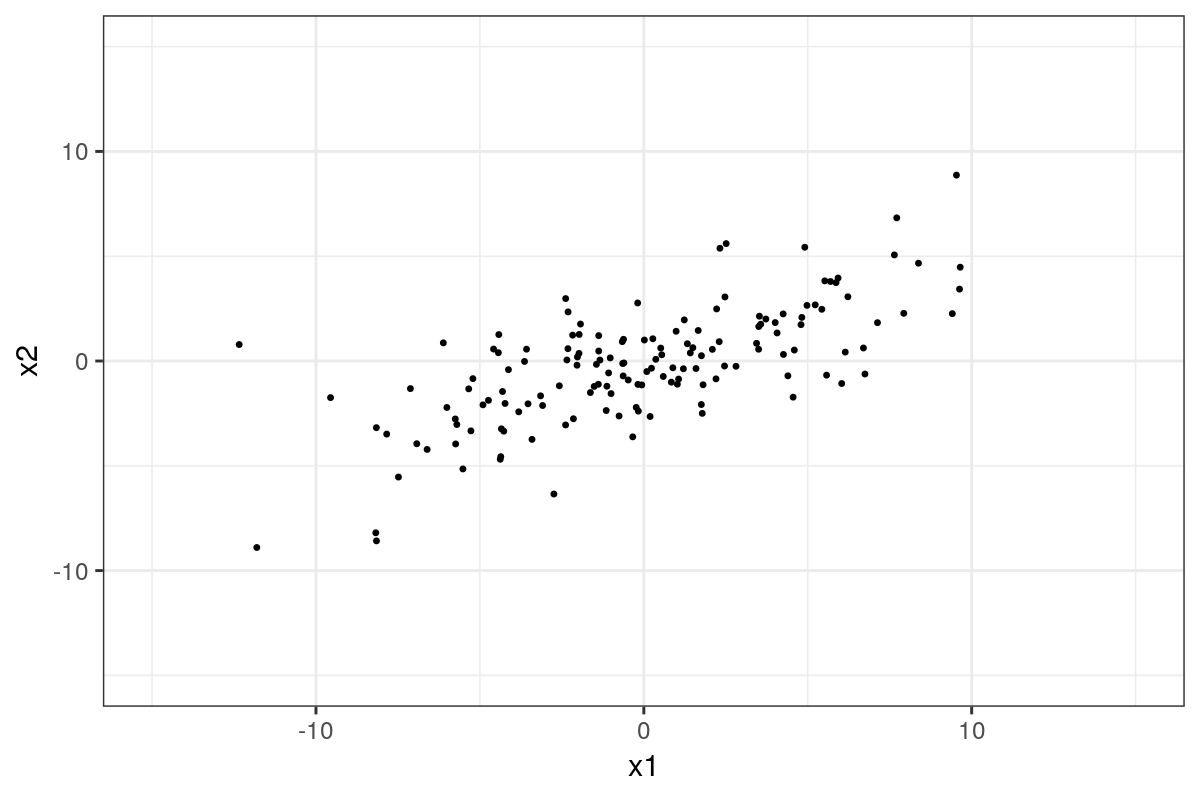

In [7]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

#set.seed(123)
set.seed(124)
N<-150
x1<-c(rnorm(N,mean=0,sd=5))
x2<-c(0.4*x1+rnorm(N,mean=0,sd=2))

mydata<-data.frame(x1,x2)
ggplot(mydata,aes(x=x1,y=x2))+geom_point(size=0.5)+    
        xlim(c(-15,15))+ylim(c(-15,15))+
        theme_bw()

La dirección de máxima dispersión va a venir dada por la **covarianza**:
##### Covarianza

La covarianza es un valor que indica el grado de variación **lineal** conjunta de dos variables aleatorias respecto a sus medias.

Supongamos que queremos comparar dos variables aleatorias X e Y:
* Tendremos alta covarianza (positiva) cuando, para valores altos de X, tengamos mayoritariamente valores altos de Y
* Tendremos baja covarianza (negativa) cuando, para valores altos de X, tengamos mayoritariamente valores bajos de Y
* Tendremos covarianza cercana a 0, para valores altos de X, los valores de Y pueden ser altos o bajos por igual


Su formula es la siguiente:
\\[
cov(X,Y) = \frac{1}{N} \sum _{i=1}^N \left( x_i-\bar{x} \right)\left( y_i-\bar{y} \right)
\\]

Recordemos la formula de la varianza:
\\[
Var(x) =  \frac{1}{N} \sum _{i=1}^N \left( x_i-\bar{x} \right)^2
\\]

La covarianza de una variable aleatoria consigo misma es igual a la varianza:
\\[
cov(X,X) = Var(X)
\\]

En R la calculamos con la función *cov(x,y)*



In [10]:
M<-matrix(c(mydata$x1,mydata$x2),ncol=2,byrow = FALSE)
#head(M)
paste("La covarianza:")
cov(M)
paste("es igual al producto de la matriz consigo misma dividido por N-1:")
t(M) %*% M

[1] "La covarianza:"

20.248905,8.697023
8.697023,7.564413


[1] "es igual al producto de la matriz consigo misma dividido por N-1:"

3017.681,1297.398
1297.398,1131.099


In [11]:
#La covarianza es equivante a:
(t(M) %*% M)/(N-1)

20.25289,8.707370
8.70737,7.591266


In [ ]:
?cov

### Autovectores y autovalores

Un autovector (*eigenvector*) de una matrix $A$, es un vector cuyo valor solo cambia por un escalar $\lambda$, llamado autovalor (*eigenvalue*), cuando se multiplica por la matriz $A$ 

In [12]:
A<-matrix(c(1,1,1,3),ncol=2)
A

1,1
1,3


In [13]:
eigen(A)

eigen() decomposition
$values
[1] 3.4142136 0.5857864

$vectors
          [,1]       [,2]
[1,] 0.3826834 -0.9238795
[2,] 0.9238795  0.3826834


In [14]:
v1<-eigen(A)$vectors[,1]
l1<-eigen(A)$values[1]
# Multiplicar la matriz A por su autovector v1
A %*% v1
# Es equivalente a multiplicar el autovector v1 por su autovalor l1
matrix(l1*v1,ncol=1)

1.306563
3.154322


1.306563
3.154322


Esto significa que si tenemos una serie de puntos (en rojo), al ser multiplicados por la matriz $A$ se van a **desplazar** siguiendo la **dirección** dada por los autovectores con la **magnitud** dada por los autovalores.

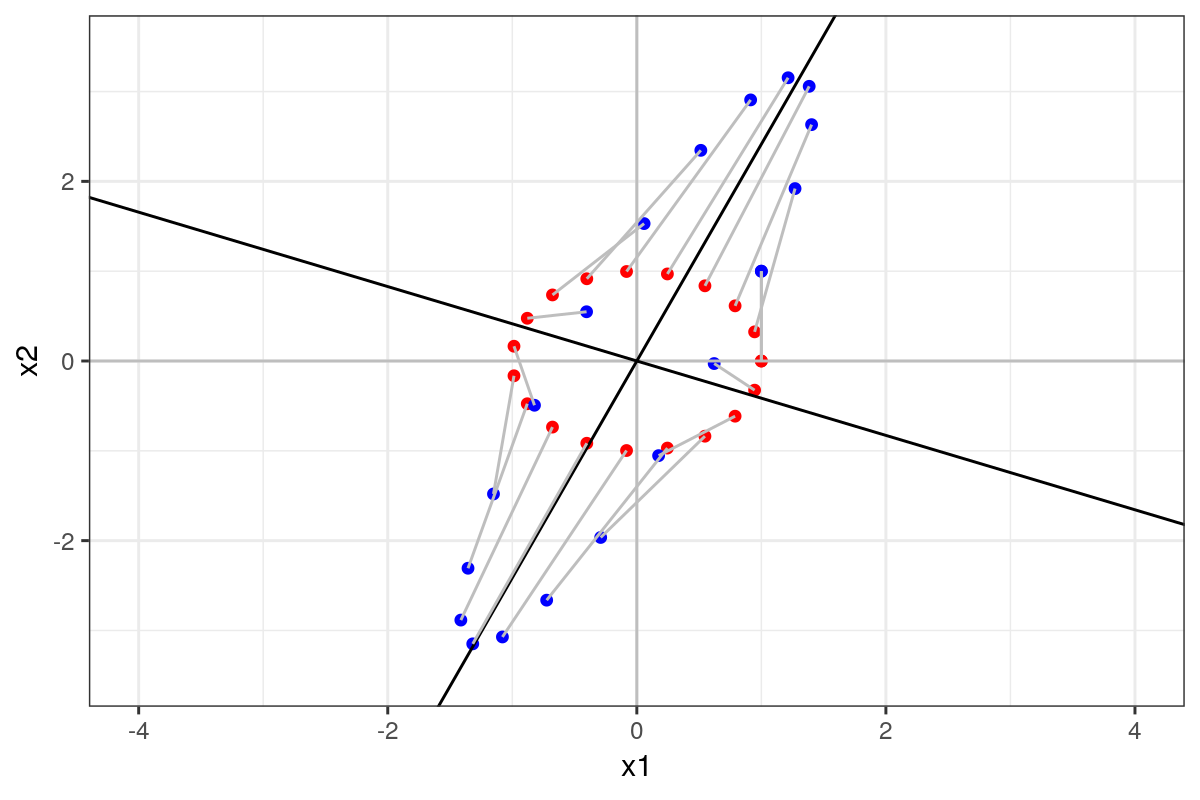

In [15]:
N<-20
df<-data.frame(x1=cos(seq(0,2*pi,length.out = N)),x2=sin(seq(0,2*pi,length.out = N)),
               x1n=rep(NA,N),x2n=rep(NA,N))
for (i in 1:nrow(df)){
    v <- A %*% matrix(unlist(df[i,1:2]),ncol=1)
    df$x1n[i]<-v[1]
    df$x2n[i]<-v[2]
}
eigv<-eigen(A)$vectors

ggplot(df)+geom_point(aes(x=x1,y=x2),color="red")+
    geom_point(aes(x=x1n,y=x2n),color="blue")+
    geom_hline(yintercept = 0,color="gray")+
    geom_vline(xintercept = 0,color="gray")+
    geom_abline(intercept = 0,slope = eigv[2,1]/eigv[1,1],color="black")+
    geom_abline(intercept = 0,slope = eigv[2,2]/eigv[1,2],color="black")+
    geom_segment(aes(x = x1, y = x2, xend=x1n,yend=x2n),color="gray")+
    xlim(c(-4,4))+ylim(c(-3.5,3.5))+
    theme_bw()

### Análisis de componentes principales

En este caso vamos a realizar una transformación de nuestros datos originales en un nuevo espacio vectorial.


Nos interesa encontrar la dirección de máxima variabilidad de los datos para, sobre esa dirección (vector), proyectar nuestros datos sobre una base **ortonormal**.

\\[
\vec{p}= \sum_i \alpha_i \vec{u}_i
\\]

Los autovectores de la matriz de covarianza de nuestros datos o $A^\intercal·A$ nos proporcionan esa base vectorial sobre la cual proyectar nuestros datos.
* Cuanto mayor sea el *autovalor*, más importancia, más varianza, tendrá la proyección de los datos sobre el *autovector* correspondiente.
* Los autovalores de la matriz de covarianza de A  coinciden con la diagonal de la matriz de covarianza de la proyección de  A  sobre la base vectorial de autovectores

eigen() decomposition
$values
[1] 3678.4596  470.3199

$vectors
           [,1]       [,2]
[1,] -0.8910839  0.4538385
[2,] -0.4538385 -0.8910839


eigen() decomposition
$values
[1] 24.670594  3.142724

$vectors
           [,1]       [,2]
[1,] -0.8914069  0.4532038
[2,] -0.4532038 -0.8914069


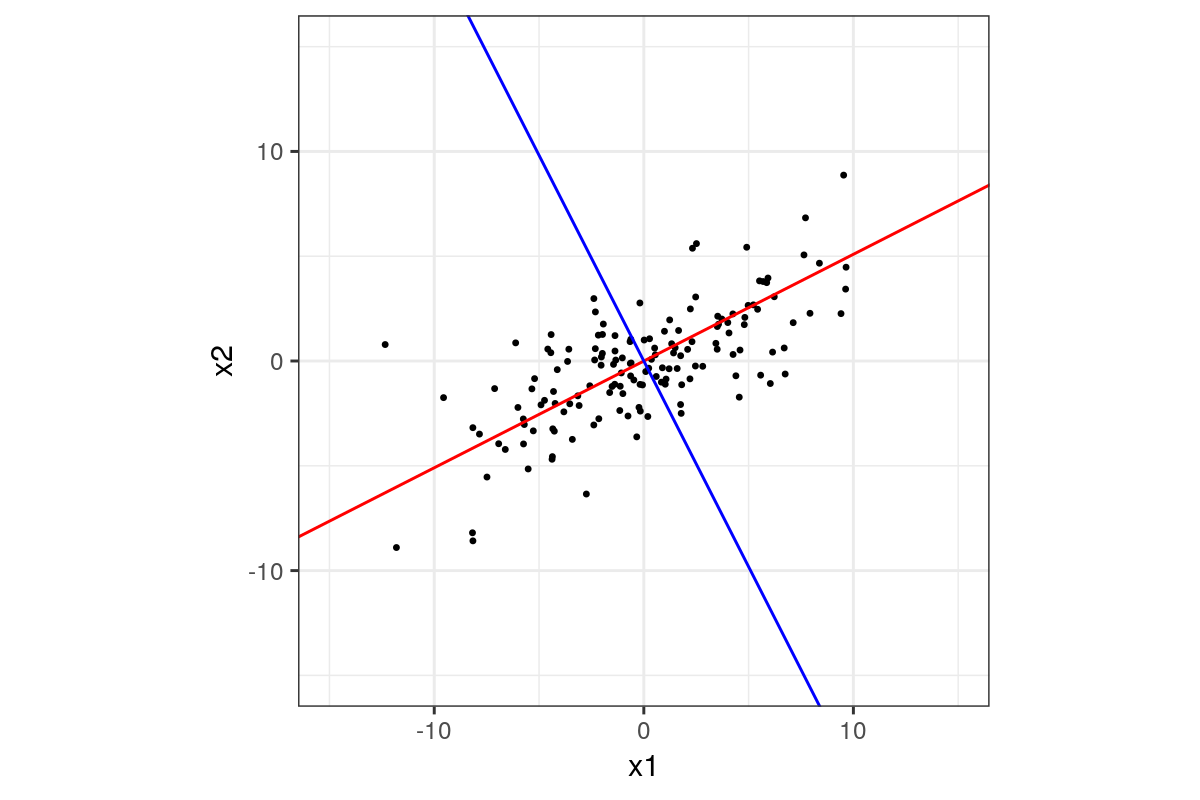

In [16]:
M<-matrix(c(mydata$x1,mydata$x2),ncol=2)
eigv<-eigen(t(M) %*% M)$vector
eigen(t(M) %*% M)
eigen(cov(M))

ggplot(mydata,aes(x=x1,y=x2))+geom_point(size=0.5)+    
        geom_abline(intercept = 0,slope = eigv[2,1]/eigv[1,1],color="red")+
        geom_abline(intercept = 0,slope = eigv[2,2]/eigv[1,2],color="blue")+
        xlim(c(-15,15))+ylim(c(-15,15))+
        theme_bw()+ coord_fixed() 

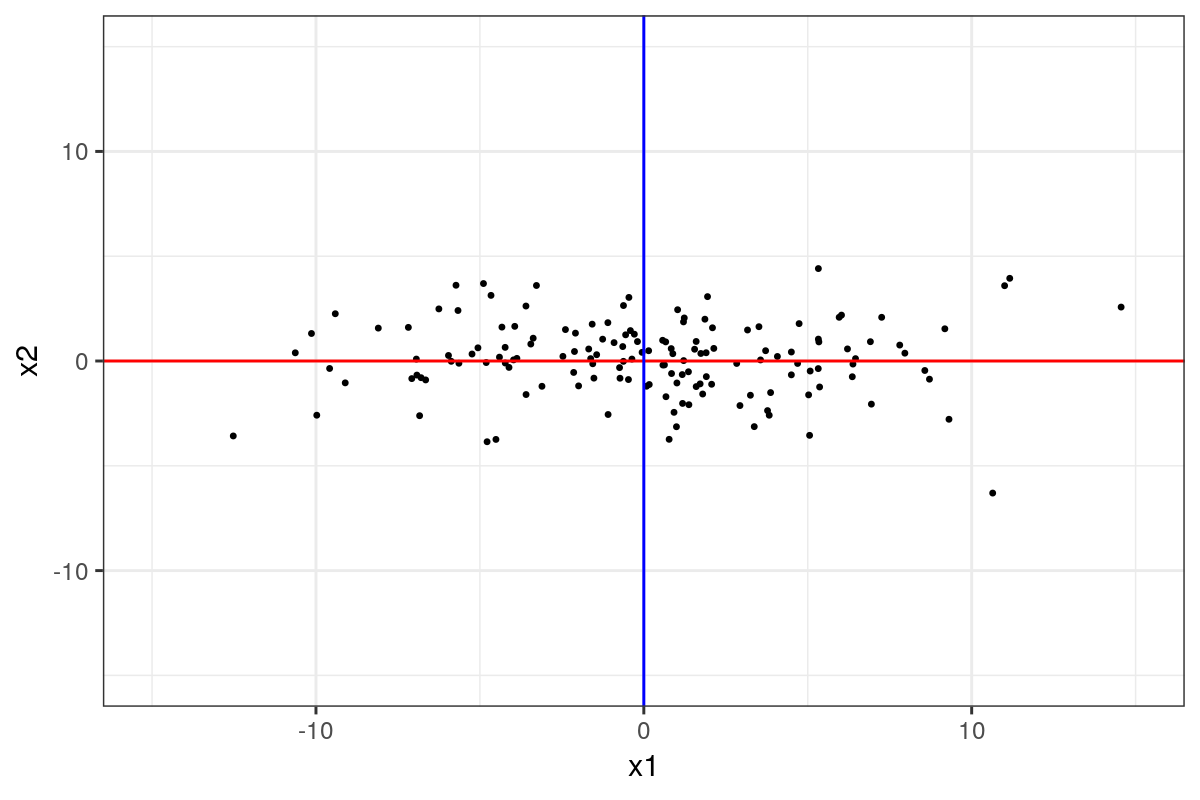

In [17]:
mydata_rot<-data.frame(x1=M %*% eigv[,1],x2=M %*% eigv[,2])


ggplot(mydata_rot,aes(x=x1,y=x2))+geom_point(size=0.5)+    
        geom_hline(yintercept = 0,color="red")+
        geom_vline(xintercept = 0,color="blue")+
        xlim(c(-15,15))+ylim(c(-15,15))+
        theme_bw()

In [18]:
# Los autovalores de la matriz de covarianza de A  coinciden con 
# la diagonal de la matriz de covarianza de la proyección de  A  sobre la base vectorial de autovectores
var(mydata_rot)
eigen(var(M))$values

,x1,x2
x1,24.67058345,-0.01533166
x2,-0.01533166,3.14273523


[1] 24.670594  3.142724

### Diferencias entre PCA y regresión lineal

La regresión lineal busca minimizar el error cuadrático medio:
\\[
MSE = {1 \over n} \sum_{i=0}^n{(Y-\hat{Y})^2}
\\]
En PCA buscamos maximizar la proyección de nuestros datos sobre la nueva base vectorial.

En la siguiente figura se ve claro:
* PCA busca minimizar la distancia de los puntos a la línea roja de forma perpendicular (línea discontinua)
* Regresión linear busca minimizar la distancia de los puntos a la línea verde de forma vertical (línea discontinua)

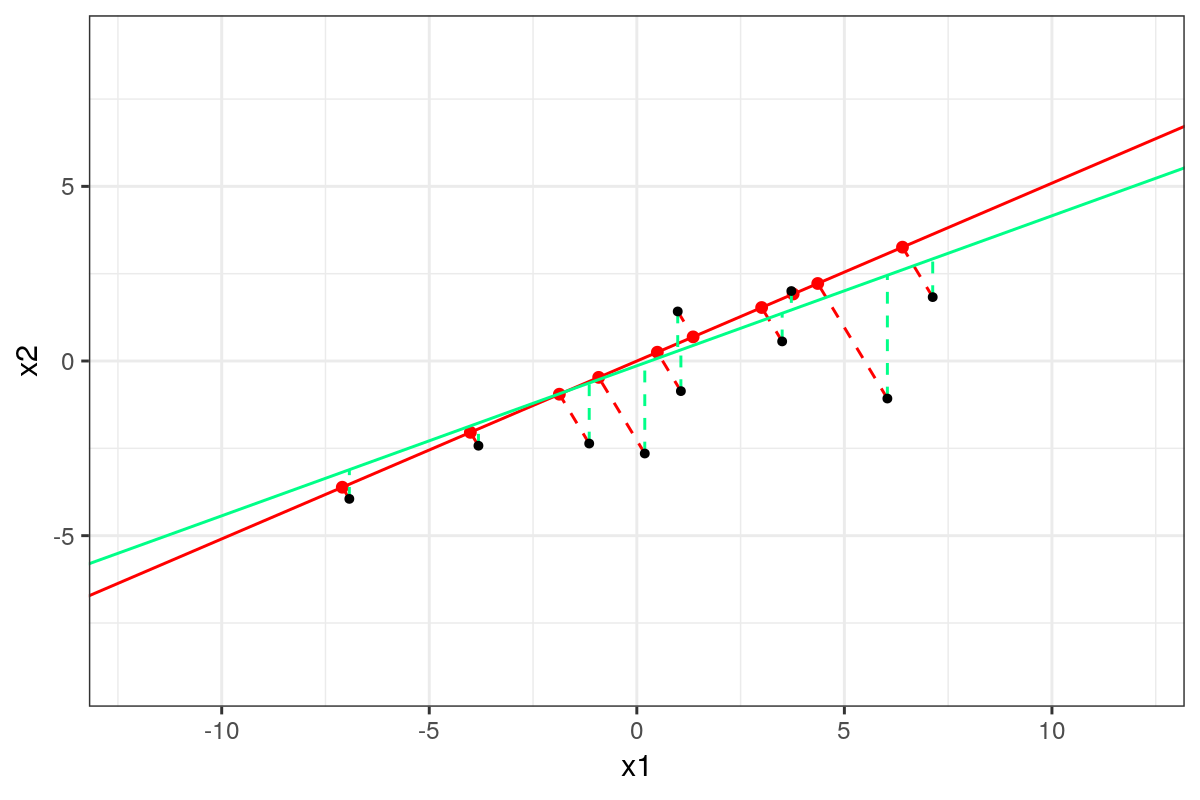

In [19]:
mydata_pca1<-as.data.frame(x=matrix(mydata_rot$x1,ncol=1) %*% t(eigv[,1]))
colnames(mydata_pca1)<-c("x1pca","x2pca")
mydata_total<-cbind(mydata,mydata_pca1)

linear_model<-lm(mydata,formula=x2~x1)
mydata_total$x2lm<-predict(linear_model,mydata)

ggplot(mydata_total[1:10,],aes(x=x1,y=x2))+
        geom_point(aes(x=x1pca,y=x2pca),color="red")+
        geom_abline(intercept = 0,slope = eigv[2,1]/eigv[1,1],color="red")+
        #geom_abline(intercept = 0,slope = eigv[2,2]/eigv[1,2],color="blue")+
        geom_segment(aes(x = x1, y = x2, xend=x1pca,yend=x2pca),color="red",linetype = "dashed")+
        geom_abline(intercept = linear_model$coefficients[1],slope = linear_model$coefficients[2],color="#00FF88")+
        geom_segment(aes(x = x1, y = x2, xend=x1,yend=x2lm),color="#00FF88",linetype = "dashed")+
        geom_point(size=1)+
        xlim(c(-12,12))+ylim(c(-9,9))+
        theme_bw()

https://www.reddit.com/r/interestingasfuck/comments/k40puy/line_of_best_fit_visualised/

### Calculo en R

En R podemos usar el comando 
```
prcomp(mydata)
```
para hacer un PCA, devuelve 3 listas de interés:
* x : aquí se encuentran los datos de la matriz original proyectados sobre los autovectores. Están ordenados de mayor a menor autovalor.
* sdev: Es la desviación estandard de cada columna de x. Su cuadrado es el correspondiente autovalor de cov(x).
* rotation: matriz con los autovectores


In [21]:
M<-matrix(c(mydata$x1,mydata$x2),ncol=2)

print("Covarianza")
eigen(cov(mydata))
print("Función prcomp")
prmydata<-prcomp(mydata,center = FALSE, scale. = FALSE)
prmydata

#plot(prmydata$x[,1:2])

[1] "Covarianza"


eigen() decomposition
$values
[1] 24.670594  3.142724

$vectors
           [,1]       [,2]
[1,] -0.8914069  0.4532038
[2,] -0.4532038 -0.8914069


[1] "Función prcomp"


Standard deviations (1, .., p=2):
[1] 4.968667 1.776657

Rotation (n x k) = (2 x 2):
         PC1        PC2
x1 0.8910839 -0.4538385
x2 0.4538385  0.8910839

In [22]:
# En prmydata$x tenemos los datos ya transformados. 
# Evidentemente sus autovectores serán del tipo [0,1] y [1,0], coincidirán con el eje de coordenadas.
eigen(cov(prmydata$x))

eigen() decomposition
$values
[1] 24.670594  3.142724

$vectors
              [,1]          [,2]
[1,] -0.9999997464 -0.0007121776
[2,]  0.0007121776 -0.9999997464


Evidentemente el resultado de la matrix 'prmydata$x' coincide con el obtenido de la forma anterior si utilizamos la matriz de rotación con los datos originales:

In [23]:
print("Valor dado por la función prcomp")
prmydata$x[1,]
print("Multiplicando por la matriz de rotación")
matrix(unlist(mydata[1,]),nrow=1) %*% prmydata$rotation
print("Con función predict")
predict(prmydata,newdata = mydata[1,])

[1] "Valor dado por la función prcomp"


PC1       PC2 
-7.962373 -0.374119

[1] "Multiplicando por la matriz de rotación"


PC1,PC2
-7.962373,-0.374119


[1] "Con función predict"


,PC1,PC2
1,-7.962373,-0.374119


Si nos llega un nuevo vector podemos aplicar la transformada para colocarla en el espacio proyectado por los autovectores del PCA:

In [24]:
new_vector <- matrix(c(1,1),nrow=1)
colnames(new_vector)<-c('x1','x2')
print("Multiplicando por la matriz de rotación")
new_vector %*% prmydata$rotation
print("Con Predict")
predict(prmydata,newdata = new_vector)

[1] "Multiplicando por la matriz de rotación"


PC1,PC2
1.344922,0.4372454


[1] "Con Predict"


PC1,PC2
1.344922,0.4372454


La matriz de autovalores (también llamada matriz de rotación) es una matriz ortogonal. Esto signigica que su inversa es su transpuesta:
\\[
{V} ^{\operatorname {T} }=\mathbf {V} ^{-1}
\\]

In [25]:
solve(prmydata$rotation)

,x1,x2
PC1,0.8910839,0.4538385
PC2,-0.4538385,0.8910839


In [26]:
t(prmydata$rotation)

,x1,x2
PC1,0.8910839,0.4538385
PC2,-0.4538385,0.8910839


Para obtener el valor original solo tienes que multiplicar el resultado otra vez:

In [29]:
new_vector<-matrix(c(1,1),nrow=1,dimnames=list(1,c('x1','x2')))
out<-predict(prmydata,newdata = new_vector)
out

,PC1,PC2
1,1.344922,0.4372454


In [28]:
out %*% t(prmydata$rotation)

,x1,x2
1,1,1


#### PCA como compresión de información

Podemos usar PCA para comprimir los datos, reducir la información a los autovectores más importantes y eliminar el ruido

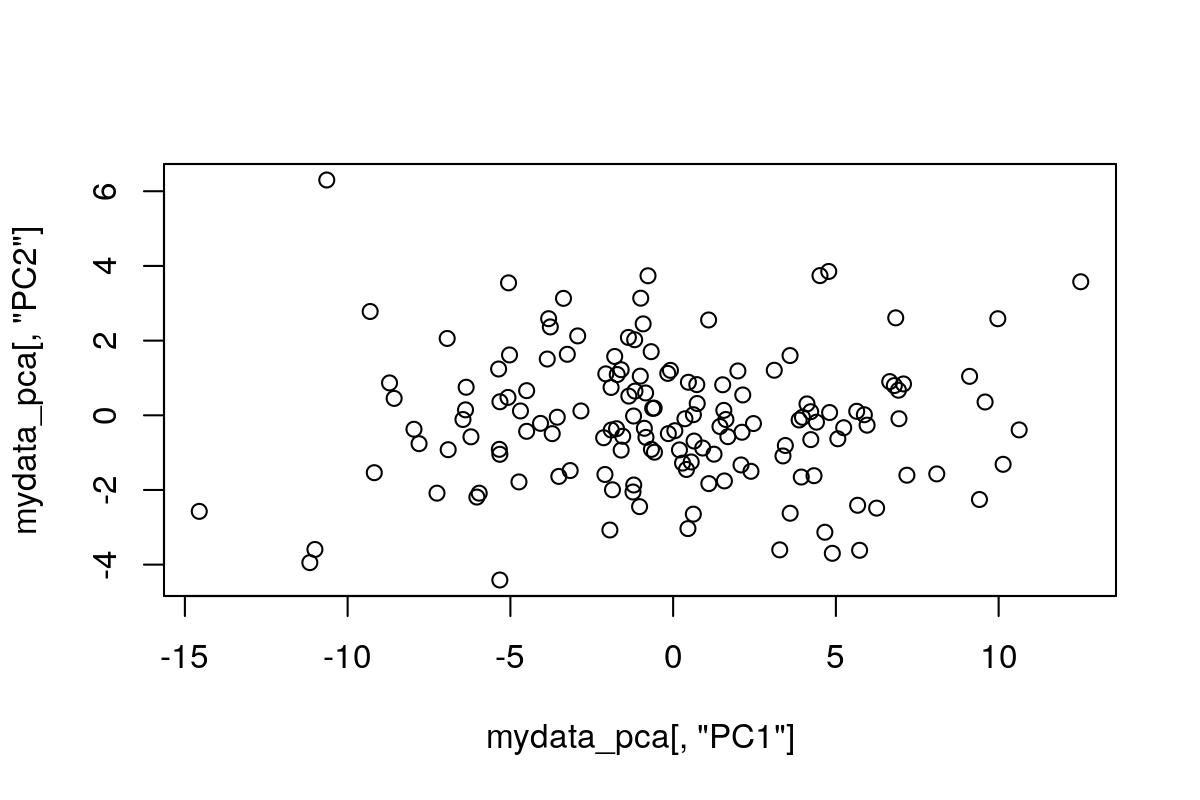

In [35]:
mydata_pca<-predict(prmydata,newdata = mydata)
plot(mydata_pca[,'PC1'], mydata_pca[,'PC2'])

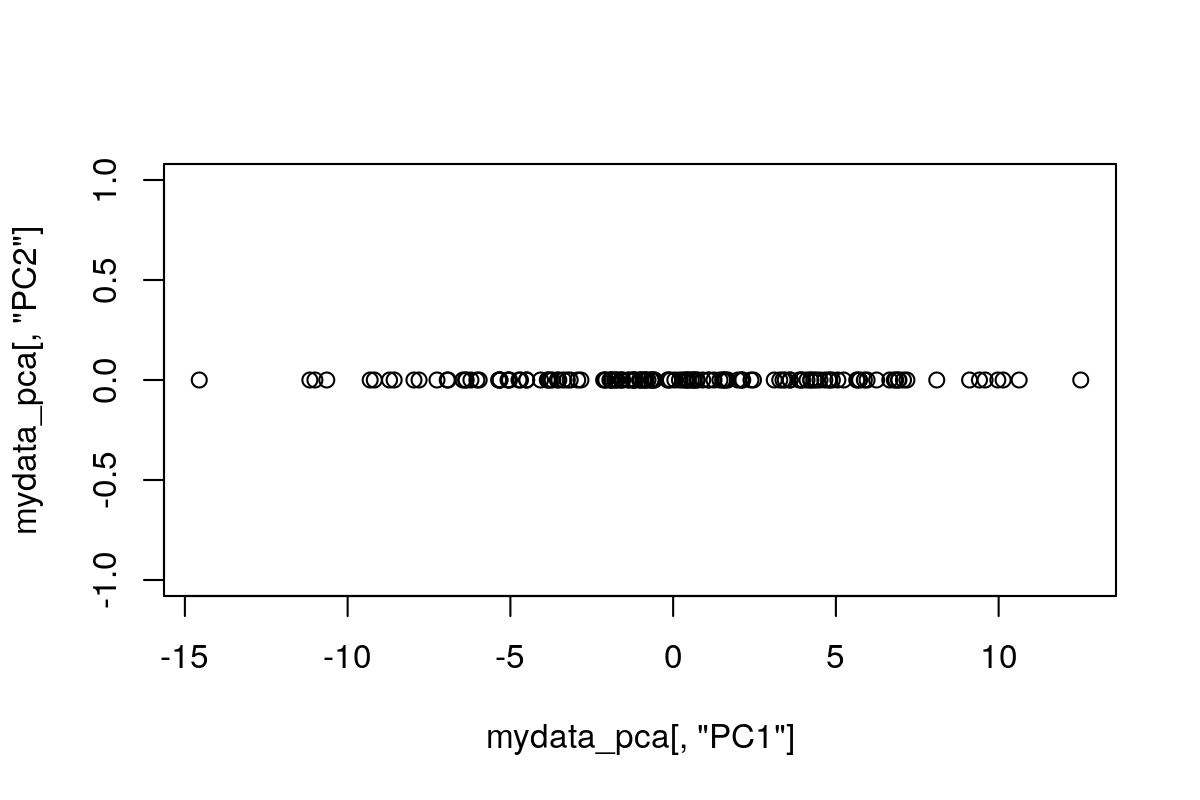

In [37]:
mydata_pca[,2]<-0
plot(mydata_pca[,'PC1'], mydata_pca[,'PC2'])

In [38]:
mydata_filtered<- mydata_pca %*% t(prmydata$rotation)

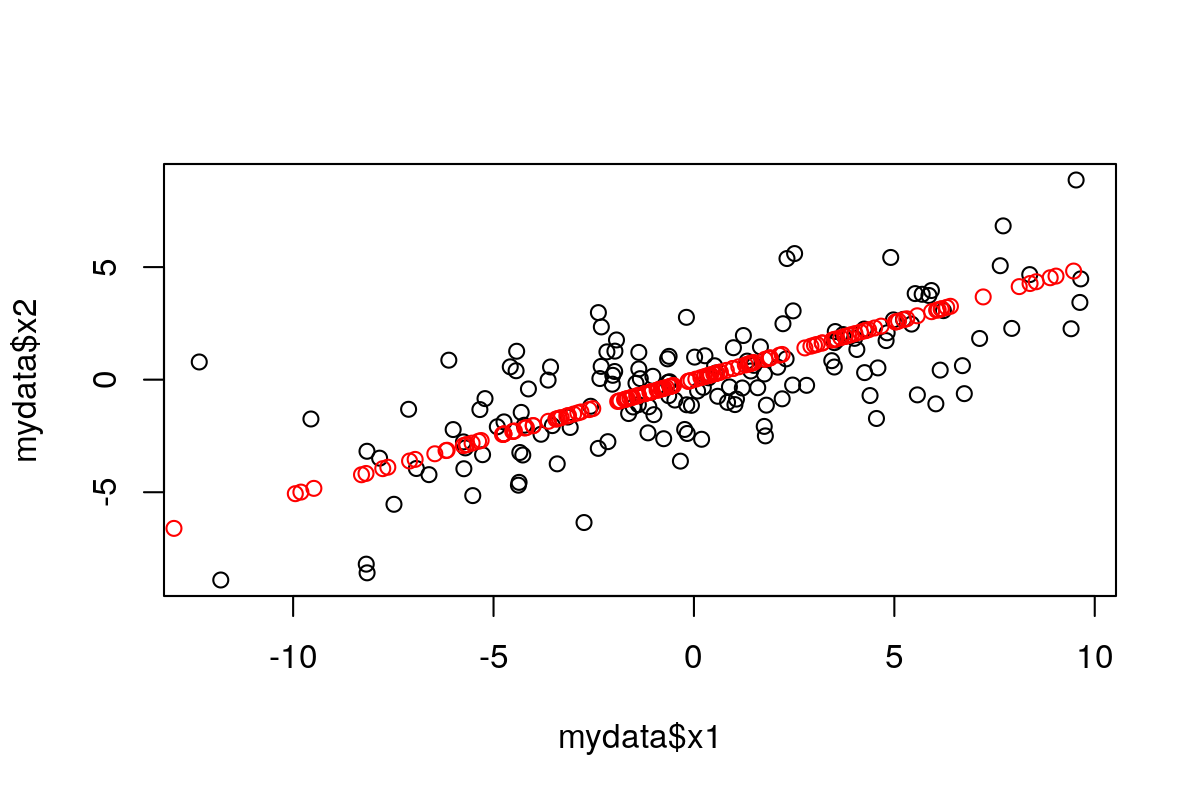

In [39]:
plot(mydata$x1,mydata$x2)
points(mydata_filtered[,1],mydata_filtered[,2],col="red")

#### Ejemplo clima ciudades


https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration

https://en.wikipedia.org/wiki/List_of_cities_by_temperature

In [40]:
df_sunny<-read.csv('data/cities_sunny.csv')
head(df_sunny)

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Ref.
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171,164.0,"1,823.0",[2]
2,Ivory Coast,Bouaké,242.0,224.0,219.0,194.0,208.0,145.0,104.0,82.0,115.0,170.0,191,198.0,"2,092.0",[2]
3,Ivory Coast,Abidjan,223.0,223.0,239.0,214.0,205.0,128.0,137.0,125.0,139.0,215.0,224,224.0,"2,296.0",[2]
4,Ivory Coast,Odienné,242.0,220.2,217.3,214.7,248.8,221.8,183.5,174.5,185.4,235.8,252,242.6,"2,638.6",[3]
5,Ivory Coast,Ferké,279.0,249.0,253.0,229.0,251.0,221.0,183.0,151.0,173.0,245.0,261,262.0,"2,757.0",[2]
6,Benin,Cotonou,213.9,210.0,223.2,219.0,213.9,141.0,136.4,148.8,165.0,207.7,243,223.2,"2,345.2",[4]


In [41]:
df_sunny$Year<-NULL
df_sunny$Ref.<-NULL

In [42]:
df_temp<-read.csv('data/cities_temp.csv')
head(df_temp)

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Ref.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Algeria,Algiers,11.2(52.2),11.9(53.4),12.8(55.0),14.7(58.5),17.7(63.9),21.3(70.3),24.6(76.3),25.2(77.4),23.2(73.8),19.4(66.9),15.2(59.4),12.1(53.8),17.4(63.3),[1]
2,Algeria,Tamanrasset,12.8(55.0),15.0(59.0),18.1(64.6),22.2(72.0),26.1(79.0),28.9(84.0),28.7(83.7),28.2(82.8),26.5(79.7),22.4(72.3),17.3(63.1),13.9(57.0),21.7(71.1),[2]
3,Algeria,Reggane,16.0(60.8),18.2(64.8),23.1(73.6),27.9(82.2),32.2(90.0),36.4(97.5),39.8(103.6),38.4(101.1),35.5(95.9),29.2(84.6),22.0(71.6),17.8(64.0),28.3(82.9),[3]
4,Angola,Luanda,26.7(80.1),28.5(83.3),28.6(83.5),28.2(82.8),27.0(80.6),23.9(75.0),22.1(71.8),22.1(71.8),23.5(74.3),25.2(77.4),26.7(80.1),26.9(80.4),25.8(78.4),[4]
5,Benin,Cotonou,27.3(81.1),28.5(83.3),28.9(84.0),28.6(83.5),27.8(82.0),26.5(79.7),25.8(78.4),25.6(78.1),26.0(78.8),26.7(80.1),27.6(81.7),27.3(81.1),27.2(81.0),[5]
6,Benin,Parakou,26.5(79.7),28.7(83.7),29.6(85.3),29.0(84.2),27.5(81.5),26.1(79.0),25.1(77.2),24.7(76.5),25.0(77.0),26.1(79.0),26.6(79.9),26.1(79.0),26.8(80.2),[6]


In [43]:
df_temp$Year<-NULL
df_temp$Ref.<-NULL

In [44]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   0.3.5      
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [45]:
get_celsius<-function(col){
    as.numeric(gsub('−','-',gsub('\\(.*\\)','',col)))
}

In [46]:
bind_cols(
list(df_temp |> select(Country,City),
df_temp |>
  select(-Country,-City) |>
  mutate_all(~get_celsius(.)) )
) -> df_temp
head(df_temp)

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Algeria,Algiers,11.2,11.9,12.8,14.7,17.7,21.3,24.6,25.2,23.2,19.4,15.2,12.1
2,Algeria,Tamanrasset,12.8,15.0,18.1,22.2,26.1,28.9,28.7,28.2,26.5,22.4,17.3,13.9
3,Algeria,Reggane,16.0,18.2,23.1,27.9,32.2,36.4,39.8,38.4,35.5,29.2,22.0,17.8
4,Angola,Luanda,26.7,28.5,28.6,28.2,27.0,23.9,22.1,22.1,23.5,25.2,26.7,26.9
5,Benin,Cotonou,27.3,28.5,28.9,28.6,27.8,26.5,25.8,25.6,26.0,26.7,27.6,27.3
6,Benin,Parakou,26.5,28.7,29.6,29.0,27.5,26.1,25.1,24.7,25.0,26.1,26.6,26.1


In [47]:
#https://rpubs.com/williamsurles/293454
df_temp |> inner_join(df_sunny, by=c('Country','City'), suffix=c('_temp','_sun')) -> df_meteo
rownames(df_meteo)<-paste(df_meteo$Country,df_meteo$City,sep = '-')
df_meteo$City<-NULL
df_meteo$Country<-NULL
str(df_meteo)

'data.frame':	304 obs. of  24 variables:
 $ Jan_temp: num  11.2 12.8 26.7 27.3 26.5 24.9 25.4 26 25.9 24.8 ...
 $ Feb_temp: num  11.9 15 28.5 28.5 28.7 27.8 25.1 25 25.3 27.7 ...
 $ Mar_temp: num  12.8 18.1 28.6 28.9 29.6 30.9 24.2 24 24.1 30.9 ...
 $ Apr_temp: num  14.7 22.2 28.2 28.6 29 32.1 22.6 21 21.2 32.6 ...
 $ May_temp: num  17.7 26.1 27 27.8 27.5 30.4 18.7 17 17.6 31.6 ...
 $ Jun_temp: num  21.3 28.9 23.9 26.5 26.1 28.1 15.7 13 14.3 29.2 ...
 $ Jul_temp: num  24.6 28.7 22.1 25.8 25.1 26.4 15.8 13 14.1 27.3 ...
 $ Aug_temp: num  25.2 28.2 22.1 25.6 24.7 26 18.8 17 17.1 26.4 ...
 $ Sep_temp: num  23.2 26.5 23.5 26 25 26.2 23.1 21 21.5 27 ...
 $ Oct_temp: num  19.4 22.4 25.2 26.7 26.1 27.8 26.6 23 24.6 28.9 ...
 $ Nov_temp: num  15.2 17.3 26.7 27.6 26.6 26.5 26.4 25 25.7 27.7 ...
 $ Dec_temp: num  12.1 13.9 26.9 27.3 26.1 24.8 25.8 25 26.1 25.1 ...
 $ Jan_sun : num  149 298 219 214 261 ...
 $ Feb_sun : num  165 276 208 210 243 ...
 $ Mar_sun : num  202 322 213 223 252 ...
 $ Apr_

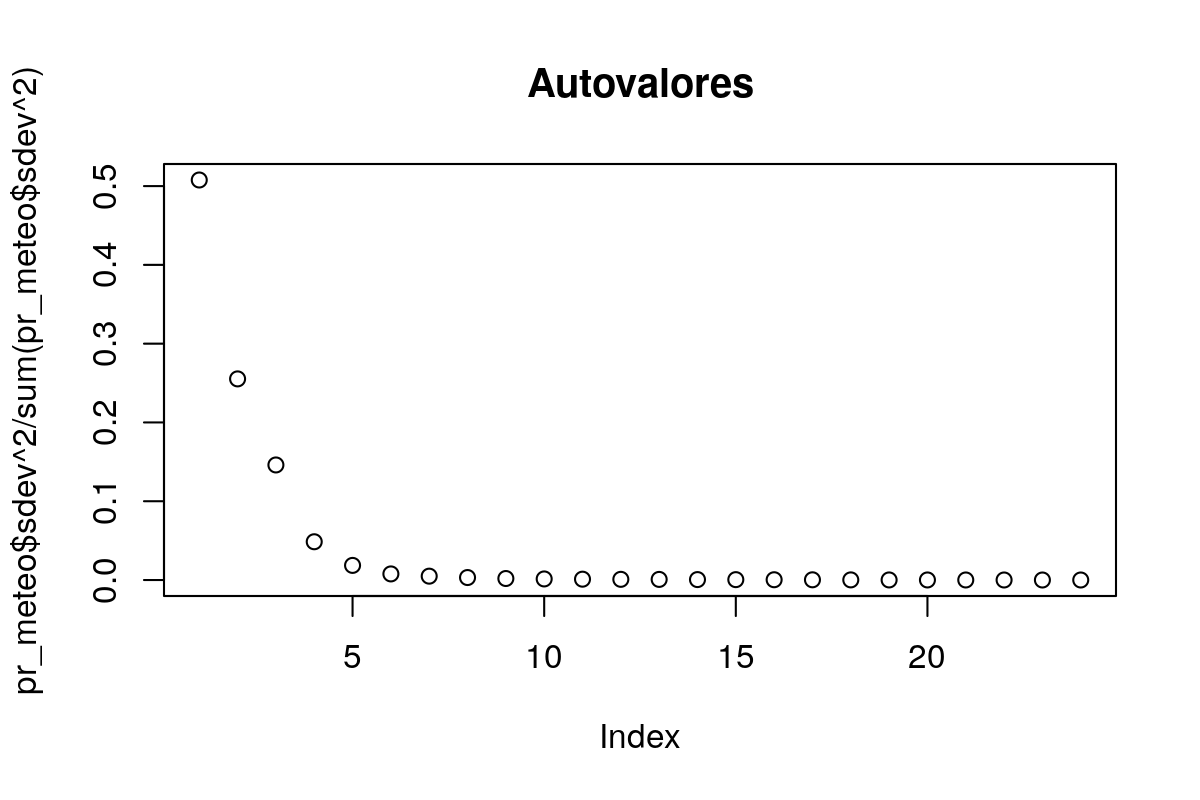

In [48]:
pr_meteo<-prcomp(df_meteo,center = TRUE, scale = TRUE)
plot(pr_meteo$sdev^2/sum(pr_meteo$sdev^2),main="Autovalores")

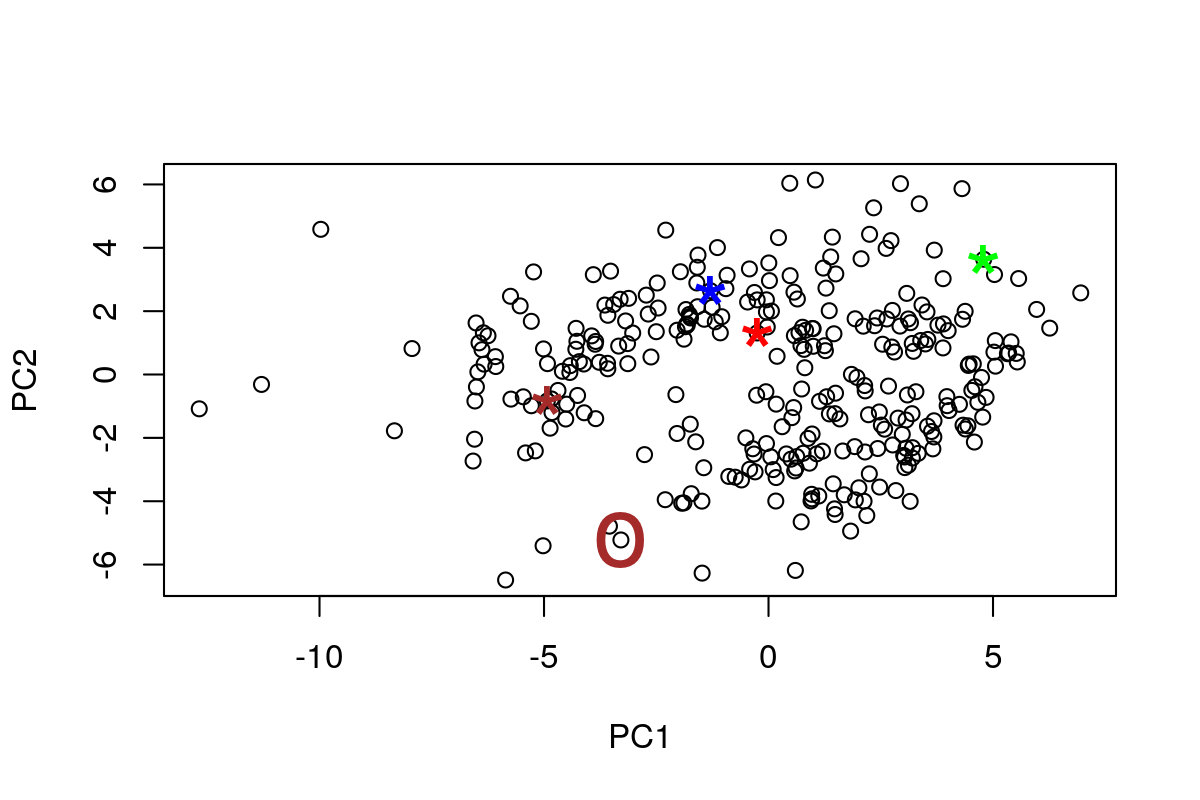

In [49]:
plot(pr_meteo$x[,c(1,2)])

city <- 'Spain-Barcelona'
points(pr_meteo$x[rownames(pr_meteo$x)==city,1],
       pr_meteo$x[rownames(pr_meteo$x)==city,2]
       ,col='red', pch='*', cex=3)


city <- 'Spain-Madrid'
points(pr_meteo$x[rownames(pr_meteo$x)==city,1],
       pr_meteo$x[rownames(pr_meteo$x)==city,2]
       ,col='blue',pch='*',cex=3)


city<-'United ArabEmirates-Dubai'
points(pr_meteo$x[rownames(pr_meteo$x)==city,1],
       pr_meteo$x[rownames(pr_meteo$x)==city,2]
       ,col='green',pch='*',cex=3)

city<-'Germany-Berlin'
points(pr_meteo$x[rownames(pr_meteo$x)==city,1],
       pr_meteo$x[rownames(pr_meteo$x)==city,2]
       ,col='brown',pch='*',cex=3)


city<-'Colombia-Bogotá'
points(pr_meteo$x[rownames(pr_meteo$x)==city,1],
       pr_meteo$x[rownames(pr_meteo$x)==city,2]
       ,col='brown',pch='o',cex=3)

In [50]:
library("FactoMineR")

ERROR: Error in library("FactoMineR"): there is no package called ‘FactoMineR’


In [ ]:
res.pca <- PCA(df_meteo )

In [ ]:
head(res.pca$eig)

In [ ]:
plot(res.pca$eig[,"eigenvalue"])

In [ ]:
plot(res.pca, choix = "ind", autoLab = "yes")

In [ ]:
plot(res.pca, choix = "var", autoLab = "yes")

In [51]:
pr_meteo$rotation[rownames(pr_meteo$rotation) 
                  %in% c('Jun_sun','Jul_sun','May_temp','Oct_temp')
                  ,1:5]

,PC1,PC2,PC3,PC4,PC5
May_temp,0.247885693,-0.00395010,0.24942737,-0.08326077,-0.02379312
Oct_temp,0.270820385,-0.05392146,0.12549324,0.12203933,0.06603039
Jun_sun,0.004585101,0.38967807,0.02680110,0.09740561,0.17924080
Jul_sun,-0.029135740,0.37319889,0.02867367,0.27506669,0.04415177


In [53]:
sort(pr_meteo$rotation[rownames(pr_meteo$rotation),1])

Jul_sun      Aug_sun      Jun_sun      May_sun      Sep_sun      Apr_sun 
-0.029135740 -0.001492316  0.004585101  0.059629737  0.101427361  0.130148126 
    Jul_temp     Aug_temp     Jun_temp      Mar_sun      Oct_sun      Feb_sun 
 0.141460026  0.160955514  0.190013157  0.198002517  0.203121024  0.230204499 
     Jan_sun      Dec_sun     Sep_temp      Nov_sun     Jan_temp     Dec_temp 
 0.232284984  0.237583473  0.238989675  0.242081658  0.242820053  0.246358468 
    May_temp     Feb_temp     Nov_temp     Mar_temp     Apr_temp     Oct_temp 
 0.247885693  0.251174756  0.260840041  0.262698448  0.268630954  0.270820385

In [54]:
pr_meteo$sdev[1:5]

[1] 3.4907841 2.4752158 1.8721204 1.0796496 0.6672469

In [ ]:
res.pca$var$coord/pr_meteo$rotation[,1:5]

In [ ]:
res.pca$var


In [ ]:
#rowSums(res.pca$var$coord^2)
res.pca$var$coord^2

#### Ejemplo Iris

Vamos a aplicar PCA al dataset de Iris

In [1]:
iris_data<-iris[,1:4]

for (i in 1:ncol(iris_data)){     
    mn<-mean(iris_data[,i],na.rm = T)
    sd<-sd(iris_data[,i],na.rm = T)
    
    iris_data[,i]<-(iris_data[,i]-mn)/sd    
}

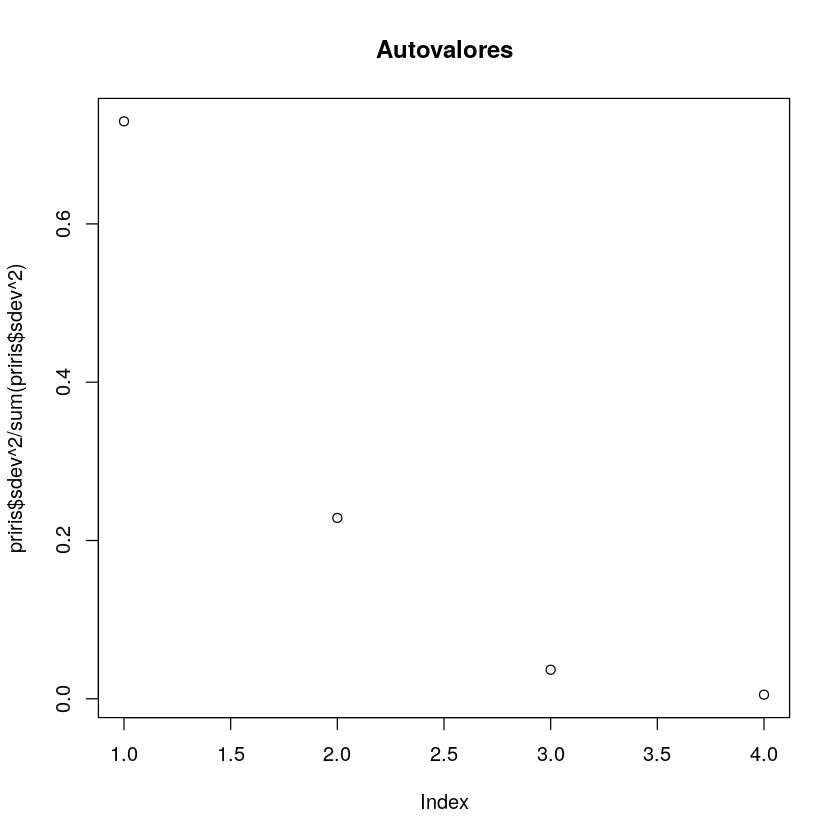

In [2]:
#Utilizamos prcomp para calcular el pca
priris<-prcomp(iris_data,center = FALSE, scale = FALSE)
#Comprobamos que los dos primeros autovalores contienen aproximadamente el 90% de la varianza
plot(priris$sdev^2/sum(priris$sdev^2),main="Autovalores")

In [5]:
priris$rotation

,PC1,PC2,PC3,PC4
Sepal.Length,0.5210659,-0.37741762,0.7195664,0.2612863
Sepal.Width,-0.2693474,-0.92329566,-0.2443818,-0.1235096
Petal.Length,0.5804131,-0.02449161,-0.1421264,-0.8014492
Petal.Width,0.5648565,-0.06694199,-0.6342727,0.5235971


In [7]:
iris_data[1,]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.8976739,1.015602,-1.335752,-1.311052


In [8]:
#Su PC1 sería:
PC1 = -0.8976739*0.5210659 - 1.015602*0.2693474 + -1.335752*0.5804131-1.311052*0.5648565
PC1

[1] -2.257141

In [10]:
priris$x[1,]

PC1         PC2         PC3         PC4 
-2.25714118 -0.47842383  0.12727962  0.02408751

            
              1  2  3
  setosa      0  0 50
  versicolor 11 39  0
  virginica  36 14  0

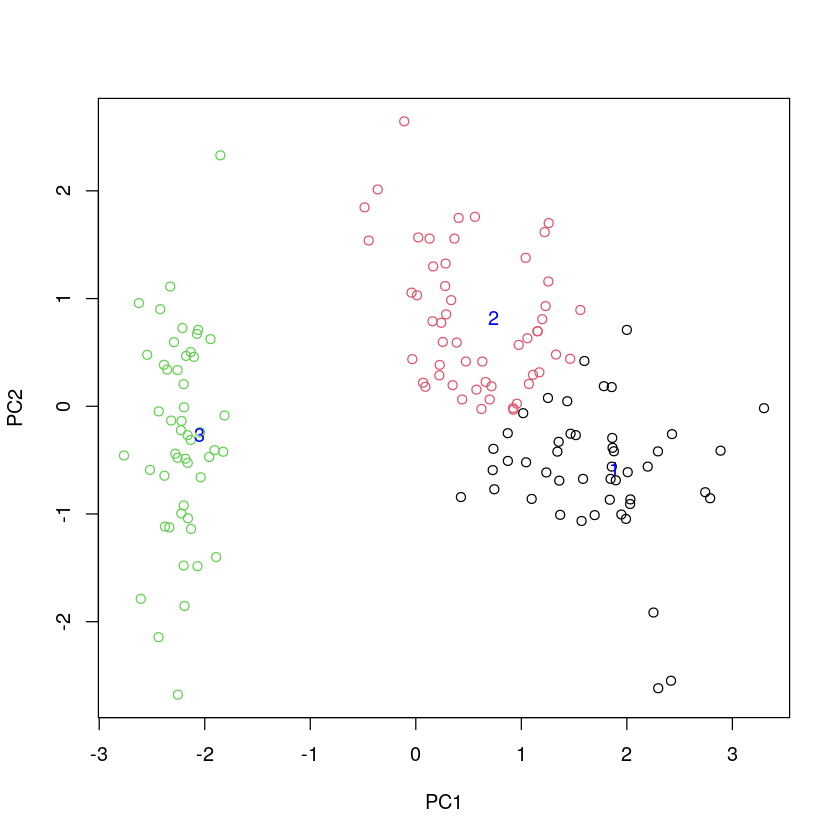

In [3]:
number_of_clusters<-3
number_of_pca<-2
my_clust<-kmeans(priris$x[,c(1:number_of_pca)],number_of_clusters)
plot(priris$x[,c(1,2)],col=my_clust$cluster)
text(x=my_clust$centers[,1], 
     y=my_clust$centers[,2], 
     cex=1, pos=4, labels=(1:nrow(my_clust$centers)),col="blue")

table(iris$Species,my_clust$cluster)

            
              0  1  2
  setosa      1 49  0
  versicolor  0  0 50
  virginica   3  0 47

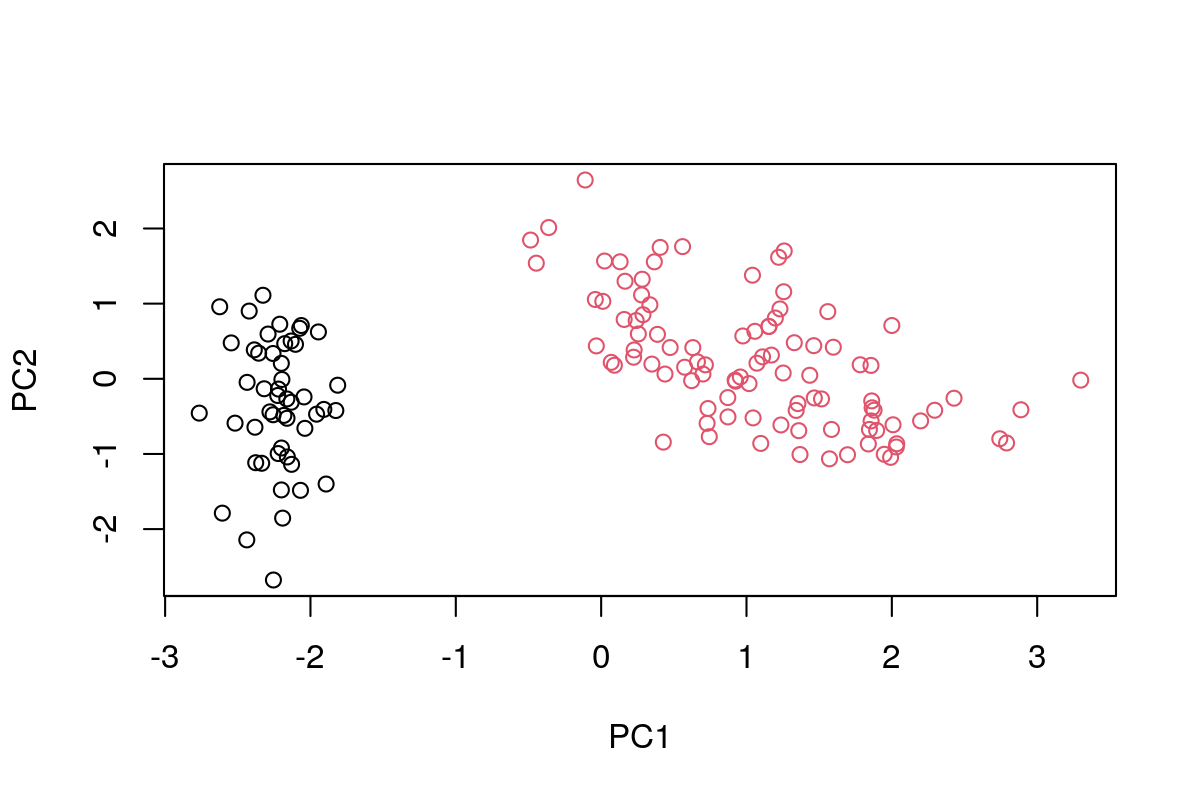

In [58]:
library(dbscan)
number_of_pca<-2
#my_clust<-hdbscan(priris$x[,c(1:number_of_pca)],minPts=4)
my_clust<-dbscan(priris$x[,c(1:number_of_pca)],minPts=5,eps=0.8)
plot(priris$x[,c(1,2)],col=my_clust$cluster)
table(iris$Species,my_clust$cluster)

#### Ejemplo proteinas

Vamos a aplicar PCA al dataset de proteinas

In [59]:
mouse<-read.csv("data/Data_Cortex_Nuclear.csv")
mouse_data<-mouse[,2:78]
for (i in 1:ncol(mouse_data)){
        
    mn<-mean(mouse_data[,i],na.rm = T)
    sd<-sd(mouse_data[,i],na.rm = T)
    mouse_data[is.na(mouse_data[,i]),i]<-mn
    
    mouse_data[,i]<-(mouse_data[,i]-mn)/sd    
}

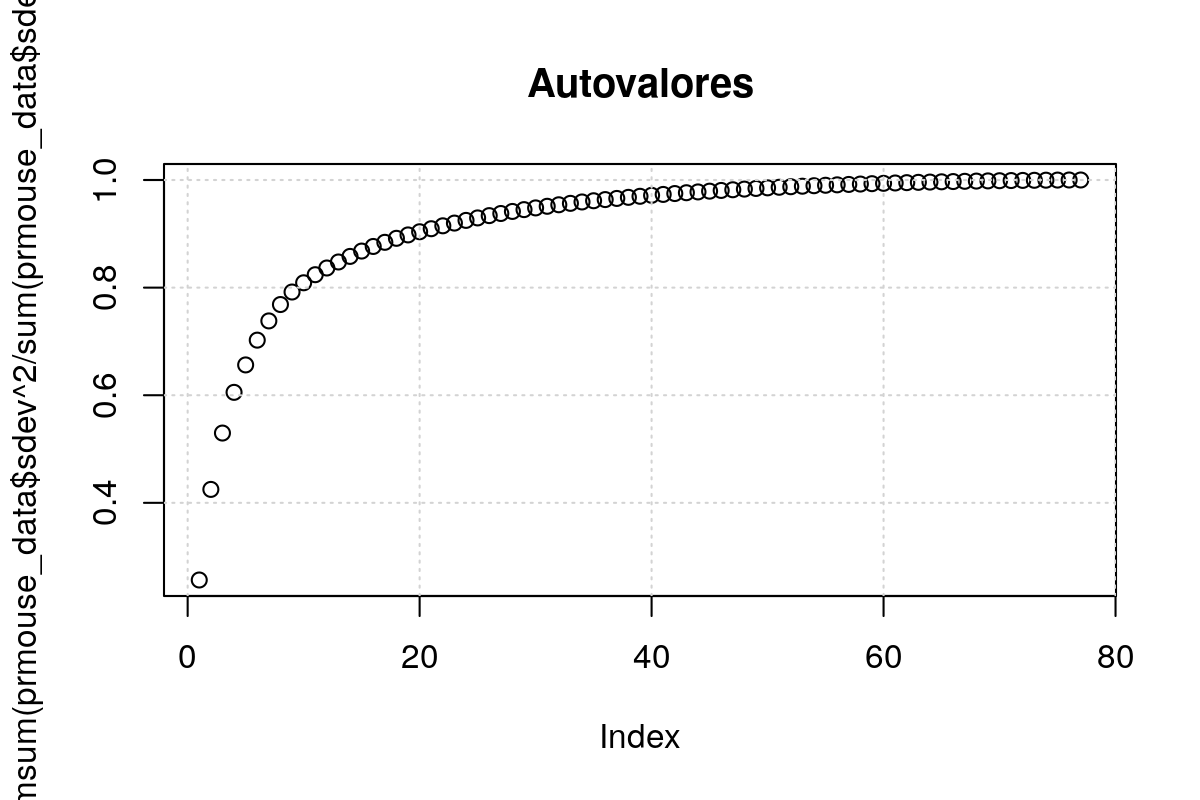

In [60]:
#Utilizamos prcomp para calcular el pca
prmouse_data<-prcomp(mouse_data,center = FALSE, scale = FALSE)
#Comprobamos que los 20 primeros autovalores contienen aproximadamente el 90% de la varianza
plot(cumsum(prmouse_data$sdev^2/sum(prmouse_data$sdev^2)),main="Autovalores")
grid()

In [61]:
head(mouse)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,⋯,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,309_1,0.5036439,0.7471932,0.4301753,2.816329,5.990152,0.2188300,0.1775655,2.373744,0.2322238,⋯,0.1083359,0.4270992,0.1147832,0.1317900,0.1281856,1.675652,Control,Memantine,C/S,c-CS-m
2,309_2,0.5146171,0.6890635,0.4117703,2.789514,5.685038,0.2116362,0.1728170,2.292150,0.2269721,⋯,0.1043154,0.4415813,0.1119735,0.1351030,0.1311187,1.743610,Control,Memantine,C/S,c-CS-m
3,309_3,0.5091831,0.7302468,0.4183088,2.687201,5.622059,0.2090109,0.1757222,2.283337,0.2302468,⋯,0.1062193,0.4357769,0.1118829,0.1333618,0.1274311,1.926427,Control,Memantine,C/S,c-CS-m
4,309_4,0.4421067,0.6170762,0.3586263,2.466947,4.979503,0.2228858,0.1764626,2.152301,0.2070042,⋯,0.1112620,0.3916910,0.1304053,0.1474442,0.1469011,1.700563,Control,Memantine,C/S,c-CS-m
5,309_5,0.4349402,0.6174298,0.3588022,2.365785,4.718679,0.2131059,0.1736270,2.134014,0.1921579,⋯,0.1106939,0.4341538,0.1184814,0.1403143,0.1483799,1.839730,Control,Memantine,C/S,c-CS-m
6,309_6,0.4475064,0.6281758,0.3673881,2.385939,4.807635,0.2185778,0.1762334,2.141282,0.1951875,⋯,0.1094457,0.4398331,0.1166572,0.1407664,0.1421804,1.816389,Control,Memantine,C/S,c-CS-m


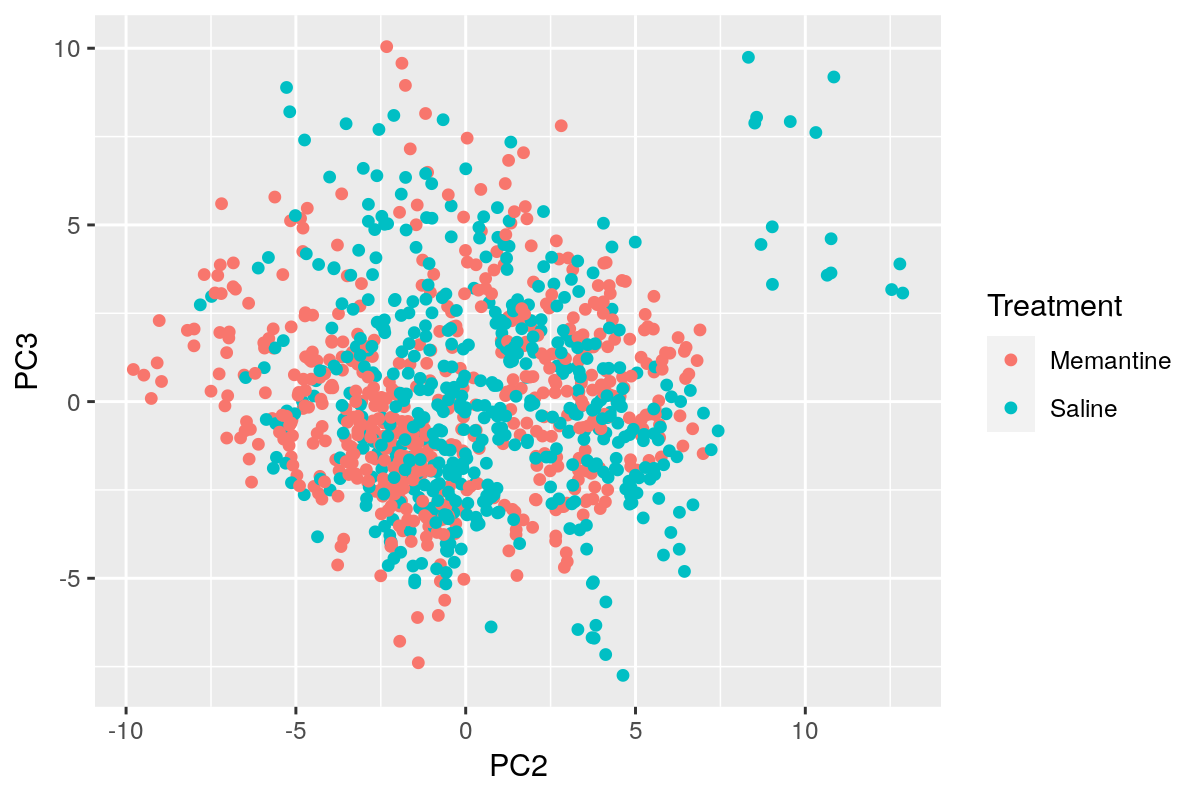

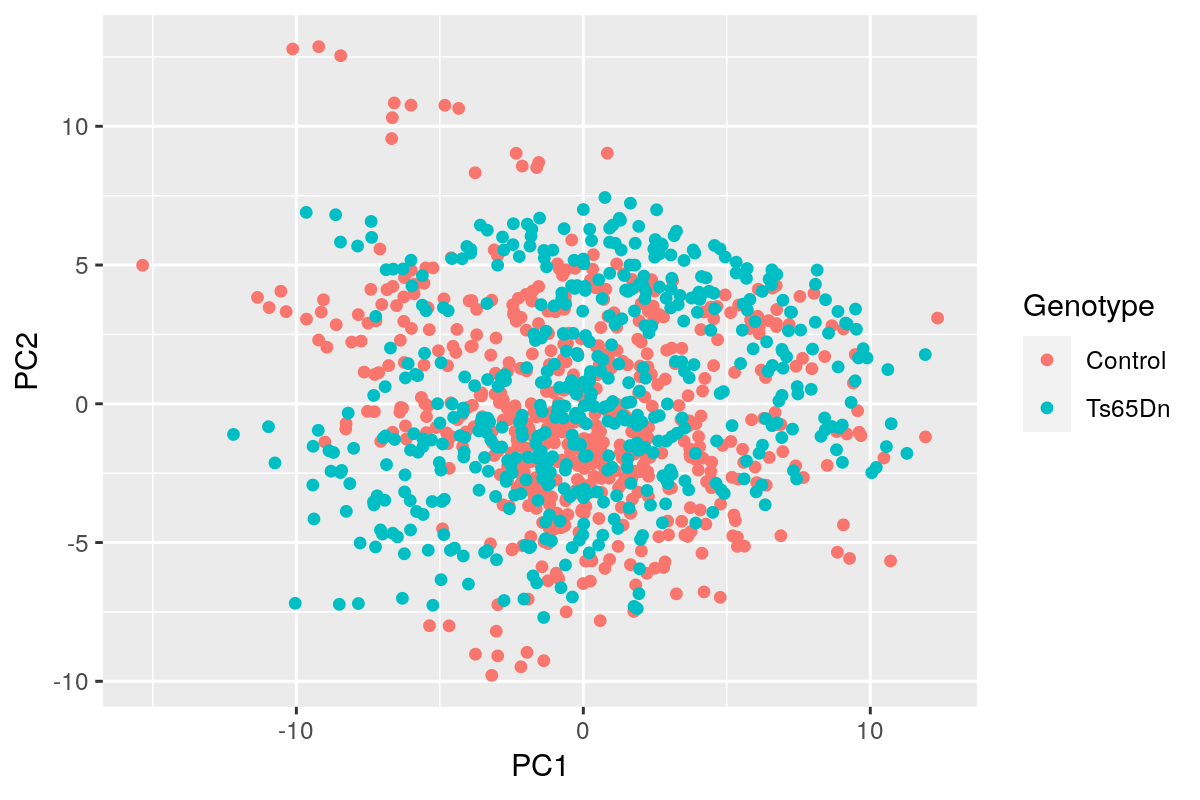

In [62]:
prmouse_data_pca<-as.data.frame(prmouse_data$x[,c("PC1","PC2","PC3")])
prmouse_data_pca$cl <- mouse[,"class"]
prmouse_data_pca$Genotype <- mouse[,"Genotype"]
prmouse_data_pca$Treatment <- mouse[,"Treatment"]
library(ggplot2)
ggplot(prmouse_data_pca,aes(x=PC2,y=PC3,color=Treatment))+geom_point()
ggplot(prmouse_data_pca,aes(x=PC1,y=PC2,color=Genotype))+geom_point()

Vamos a probar a hacer un *k-means* con solo dos dimensiones del PCA

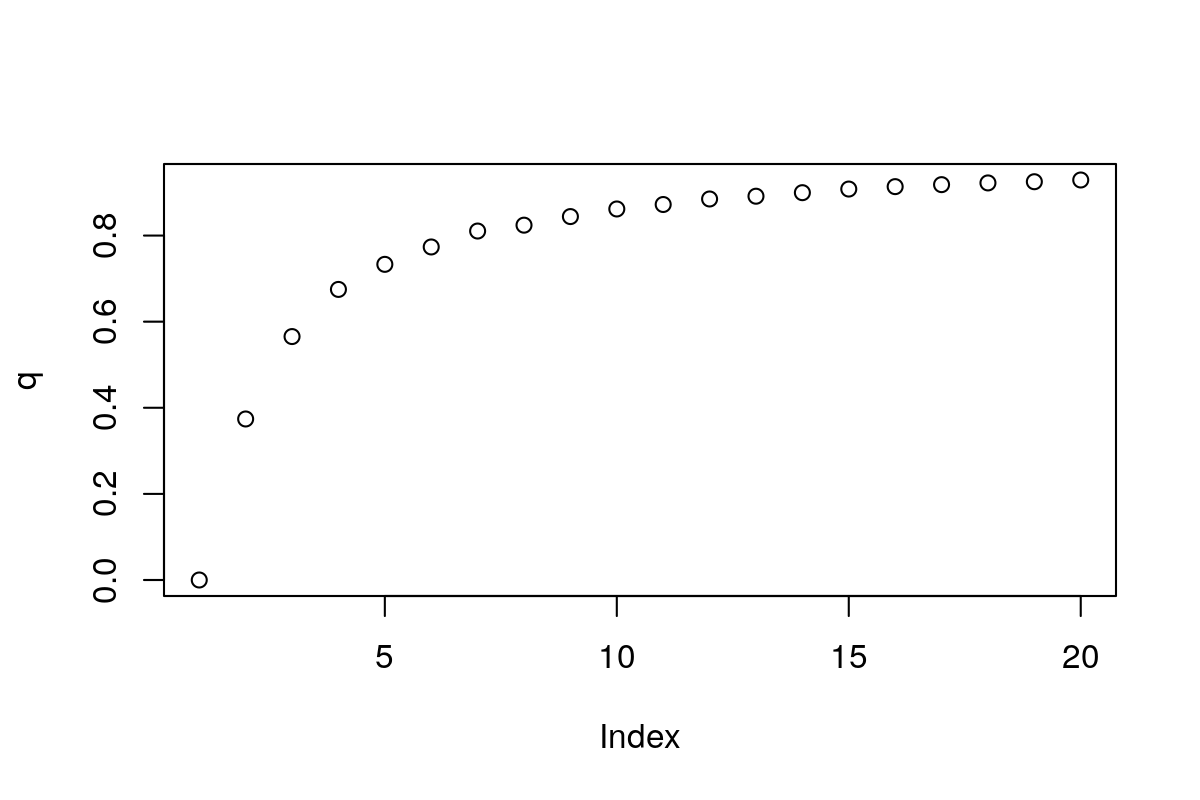

In [63]:
mouse_data14<-prmouse_data$x[,1:2]
q<-c()
for (k in 1:20){
    myclust<-kmeans(mouse_data14,k)
    q[k]<-myclust$betweenss/myclust$totss
}
plot(q)

        
          1  2  3  4  5  6  7  8  9 10
  c-CS-m 11 11  0 13  5 32 19 31 11 17
  c-CS-s 22  3  0  4  0 20 26 22 23 15
  c-SC-m  0 59 21  2 21 15  0  0  0 32
  c-SC-s  0 21  7 11 27 13  0  0  1 55
  t-CS-m 40  0  0  0 11 15  9 25 30  5
  t-CS-s 33  3  1  0  1 16  6 19 20  6
  t-SC-m  0 29 28 30  2  5  0  0  0 41
  t-SC-s  0 15  1 31 23 34  1  0  2 28

        
          1  2  3  4  5  6  7  8  9 10
  c-CS-m 43 16 23  5 11 17 11  0  0 24
  c-CS-s 24 22 29  0  3 28  0  0 15 14
  c-SC-m  0 10  0 31 31  1 70  7  0  0
  c-SC-s 12  5  0 10 23  0 70 15  0  0
  t-CS-m 12 38 38  0  2  0  0  0  0 45
  t-CS-s 11 18 41  3  0 11  0  0  0 21
  t-SC-m 10  0  0 34 20 10 48 13  0  0
  t-SC-s 26 14  0  8  2 18  5 44  0 18

     
        1   2   3   4   5   6   7   8   9  10
  C/S 106  17   1  17  17  83  60  97  84  43
  S/C   0 124  57  74  73  67   1   0   3 156

     
        1   2   3   4   5   6   7   8   9  10
  C/S  90  94 131   8  16  56  11   0  15 104
  S/C  48  29   0  83  76  29 193  79   0  18

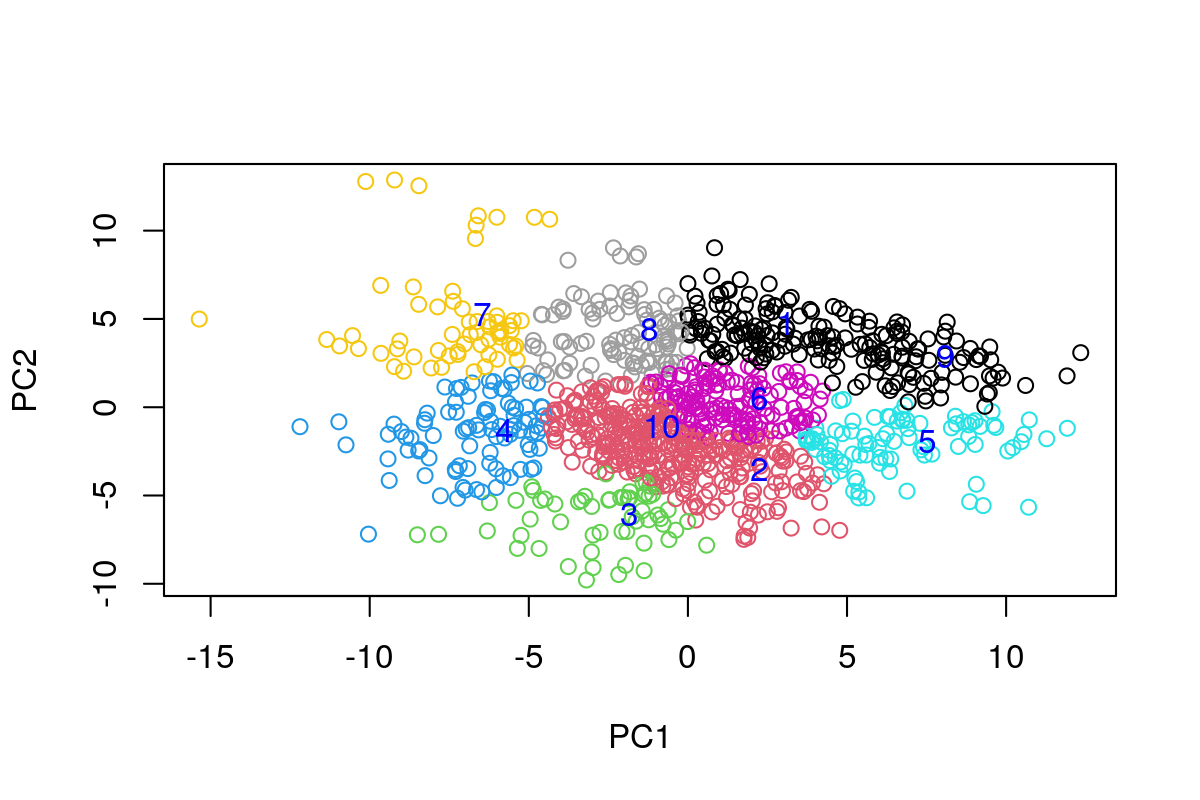

In [64]:
set.seed(123)
myclustpca<-kmeans(mouse_data14,10)
myclust<-kmeans(mouse_data,10)

table(mouse$class,myclustpca$cluster)
table(mouse$class,myclust$cluster)
table(mouse$Behavior,myclustpca$cluster)
table(mouse$Behavior,myclust$cluster)


plot(prmouse_data$x[,c(1,2)],col=myclustpca$cluster)
text(x=myclustpca$centers[,1], y=myclustpca$centers[,2], cex=1, pos=4, labels=(1:nrow(myclustpca$centers)),col="blue")


#### Ejemplo regresión logística con PCA - dataset Cancer

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Este dataset muestra tejidos de diferentes tumores de mama. Algunos son benignos y otros malignos.

Vamos a hacer un clasificador para diferenciarlos.

In [70]:
library(pracma)
library(dplyr)
set.seed(1234)
wdbc<-read.csv("data/wdbc.data",col.names=c("id","diagnosis",paste0("c",1:30)), stringsAsFactor=T)
str(wdbc)

'data.frame':	568 obs. of  32 variables:
 $ id       : int  842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 845636 ...
 $ diagnosis: Factor w/ 2 levels "B","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ c1       : num  20.6 19.7 11.4 20.3 12.4 ...
 $ c2       : num  17.8 21.2 20.4 14.3 15.7 ...
 $ c3       : num  132.9 130 77.6 135.1 82.6 ...
 $ c4       : num  1326 1203 386 1297 477 ...
 $ c5       : num  0.0847 0.1096 0.1425 0.1003 0.1278 ...
 $ c6       : num  0.0786 0.1599 0.2839 0.1328 0.17 ...
 $ c7       : num  0.0869 0.1974 0.2414 0.198 0.1578 ...
 $ c8       : num  0.0702 0.1279 0.1052 0.1043 0.0809 ...
 $ c9       : num  0.181 0.207 0.26 0.181 0.209 ...
 $ c10      : num  0.0567 0.06 0.0974 0.0588 0.0761 ...
 $ c11      : num  0.543 0.746 0.496 0.757 0.335 ...
 $ c12      : num  0.734 0.787 1.156 0.781 0.89 ...
 $ c13      : num  3.4 4.58 3.44 5.44 2.22 ...
 $ c14      : num  74.1 94 27.2 94.4 27.2 ...
 $ c15      : num  0.00522 0.00615 0.00911 0.01149 0.00751 ...
 

In [71]:
wdbc<-wdbc %>% select(-id)

idx<-sample(1:nrow(wdbc),round(nrow(wdbc)*0.7))
wdbc.train<-wdbc[idx,]
wdbc.test<-wdbc[-idx,]

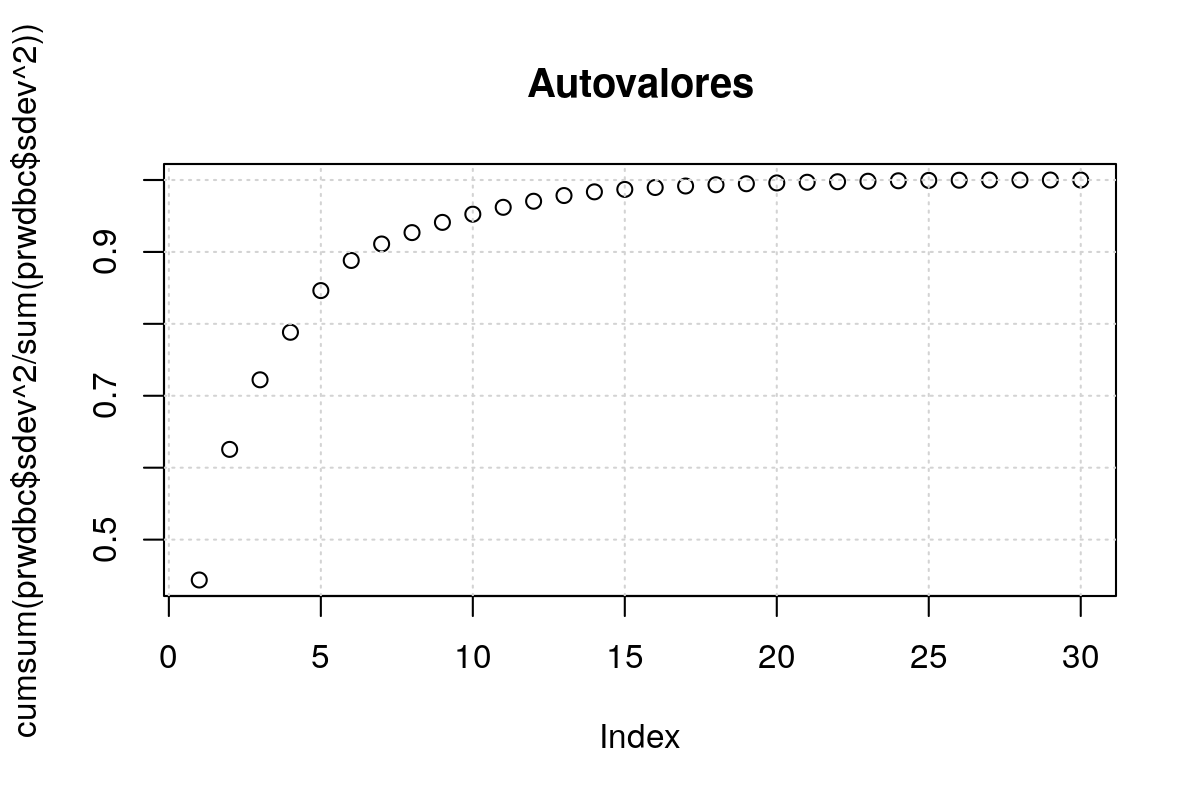

In [72]:
prwdbc<-prcomp(wdbc.train %>% select(-diagnosis),center = TRUE, scale. = TRUE)
#Comprobamos que los 5 primeros autovalores contienen aproximadamente el 90% de la varianza
#plot(prwdbc$sdev^2/sum(prwdbc$sdev^2),main="Autovalores")

plot(cumsum(prwdbc$sdev^2/sum(prwdbc$sdev^2)),main="Autovalores")
grid()

In [73]:
wdbc.train_pca <-as.data.frame(prwdbc$x[,1:2])
wdbc.train_pca$diagnosis <- wdbc.train$diagnosis
summary(wdbc.train_pca)

      PC1              PC2           diagnosis
 Min.   :-5.442   Min.   :-12.4477   B:257    
 1st Qu.:-2.718   1st Qu.: -1.2423   M:141    
 Median :-1.201   Median :  0.1604            
 Mean   : 0.000   Mean   :  0.0000            
 3rd Qu.: 2.587   3rd Qu.:  1.5044            
 Max.   :13.347   Max.   :  7.5761            

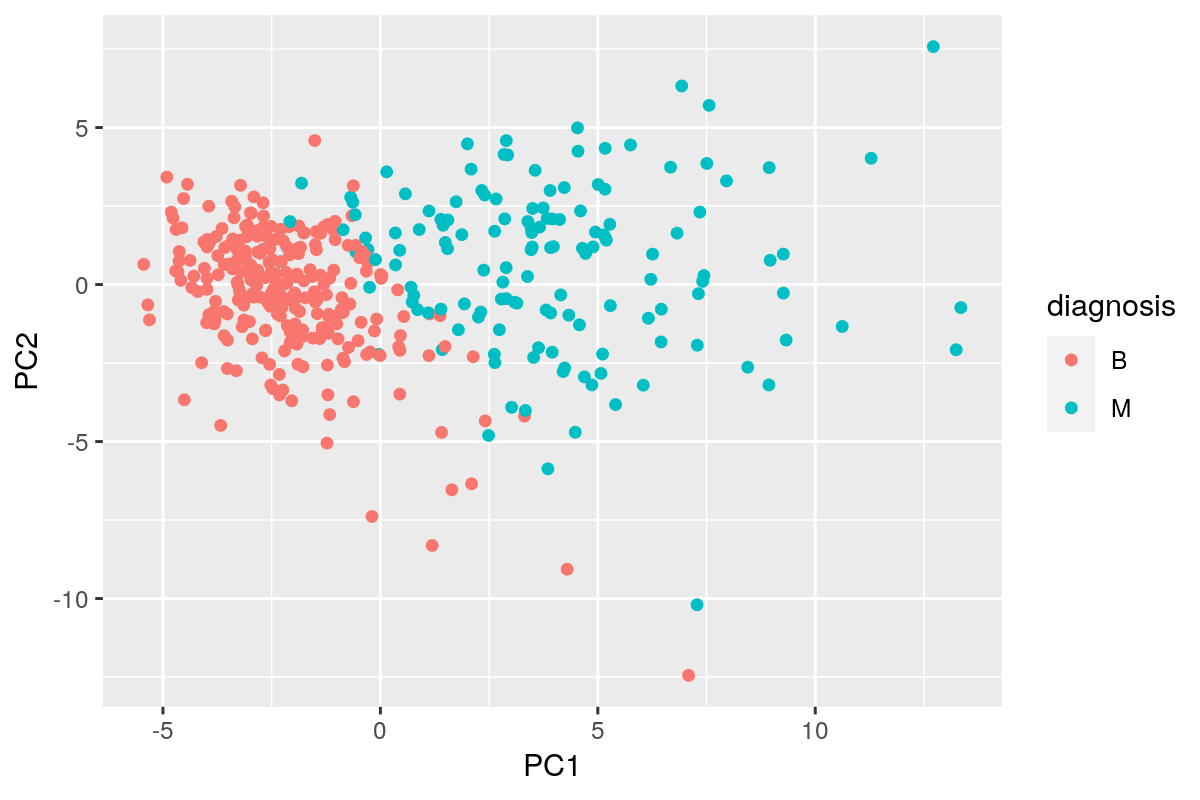

In [74]:
ggplot(wdbc.train_pca, aes(x=PC1, y=PC2, color=diagnosis))+geom_point()

In [75]:
model_wdbc<-glm(data=wdbc.train_pca,formula=diagnosis~.,family=binomial(link='logit')) 
summary(model_wdbc)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = diagnosis ~ ., family = binomial(link = "logit"), 
    data = wdbc.train_pca)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.83936  -0.12156  -0.02878   0.00671   3.08755  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.8274     0.2672  -3.096  0.00196 ** 
PC1           2.0726     0.3049   6.798 1.06e-11 ***
PC2           1.1466     0.1987   5.771 7.88e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 517.44  on 397  degrees of freedom
Residual deviance:  96.94  on 395  degrees of freedom
AIC: 102.94

Number of Fisher Scoring iterations: 8


In [76]:
y_predict<-predict(model_wdbc,wdbc.train_pca)
y_factor<-as.factor(ifelse(y_predict<0,"B","M"))

table(real=wdbc.train$diagnosis, pred=y_factor)

    pred
real   B   M
   B 250   7
   M  11 130

In [77]:
wdbc.test_pca <- as.data.frame(predict(prwdbc, wdbc.test %>% select(-diagnosis))[,c("PC1","PC2")])
summary(wdbc.test_pca)

      PC1               PC2         
 Min.   :-5.4522   Min.   :-7.8449  
 1st Qu.:-2.4154   1st Qu.:-1.0257  
 Median :-0.6720   Median : 0.4244  
 Mean   : 0.3144   Mean   : 0.2079  
 3rd Qu.: 2.9034   3rd Qu.: 1.9063  
 Max.   :16.8151   Max.   : 8.0875  

In [78]:
y_predict<-predict(model_wdbc,wdbc.test_pca)
y_factor<-as.factor(ifelse(y_predict<0,"B","M"))

table(real=wdbc.test$diagnosis, pred=y_factor)

    pred
real  B  M
   B 97  3
   M  5 65

In [79]:
cf_m<-caret::confusionMatrix(data= y_factor, reference = wdbc.test$diagnosis,positive="M")
cf_m

Confusion Matrix and Statistics

          Reference
Prediction  B  M
         B 97  5
         M  3 65
                                          
               Accuracy : 0.9529          
                 95% CI : (0.9094, 0.9795)
    No Information Rate : 0.5882          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9024          
                                          
 Mcnemar's Test P-Value : 0.7237          
                                          
            Sensitivity : 0.9286          
            Specificity : 0.9700          
         Pos Pred Value : 0.9559          
         Neg Pred Value : 0.9510          
             Prevalence : 0.4118          
         Detection Rate : 0.3824          
   Detection Prevalence : 0.4000          
      Balanced Accuracy : 0.9493          
                                          
       'Positive' Class : M               
                                    

In [80]:
paste("La precisión es:",cf_m$table[2,2]/sum(cf_m$table[2,]))
paste("La exhaustividad (recall, sensitivity) es:",cf_m$table[2,2]/sum(cf_m$table[,2]))
paste("La exactitud (accuracy) es:",(cf_m$table[2,2]+cf_m$table[1,1])/sum(cf_m$table))

bnt_test=binom.test(cf_m$table[2,2]+cf_m$table[1,1],sum(cf_m$table))
paste("El intervalo de confianza de la exactitud es: [",paste0(bnt_test$conf.int,collapse=","),"]")


[1] "La precisión es: 0.955882352941177"

[1] "La exhaustividad (recall, sensitivity) es: 0.928571428571429"

[1] "La exactitud (accuracy) es: 0.952941176470588"

[1] "El intervalo de confianza de la exactitud es: [ 0.909383319869761,0.979467271641645 ]"

[1] "The AUC is 0.990428571428571"

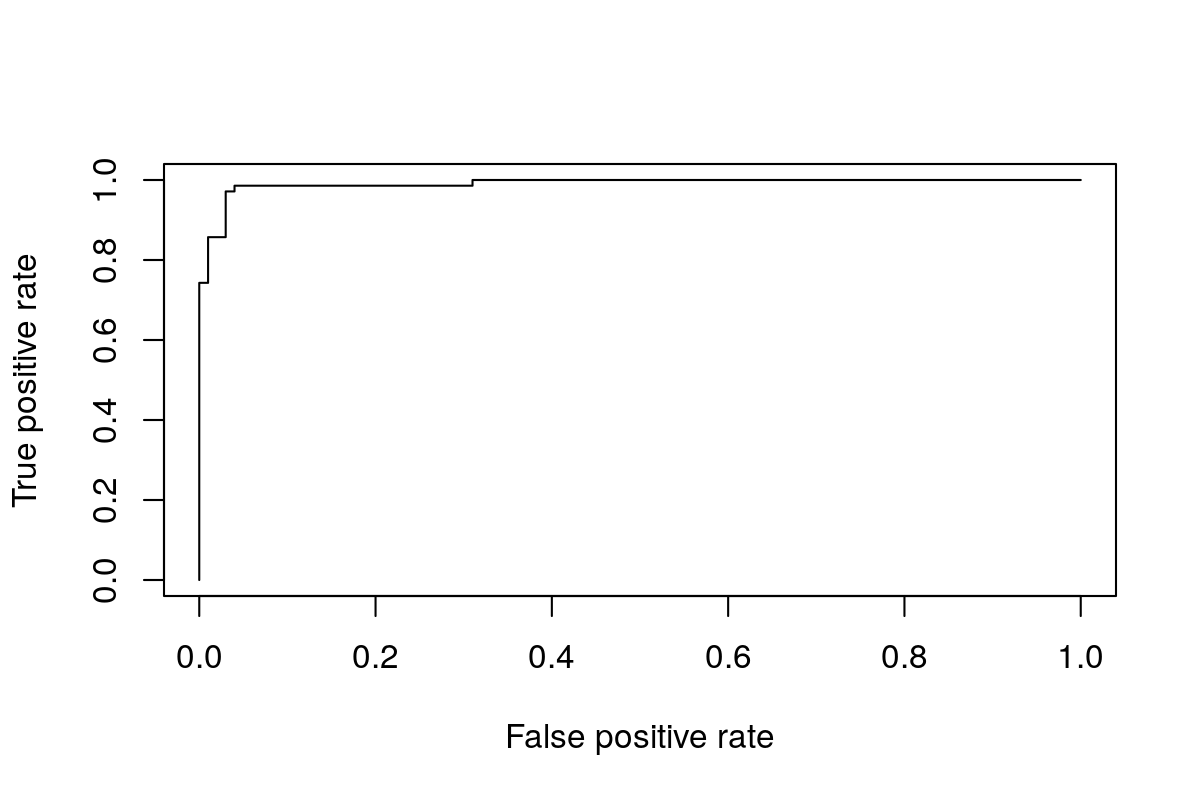

In [81]:
library(ROCR)

p<-predict(model_wdbc,wdbc.test_pca,type="response")

pr <- prediction(p, wdbc.test$diagnosis)

prf_auc=performance(pr, measure = "auc")
paste("The AUC is",prf_auc@y.values[[1]])


prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

In [ ]:
wdbc.train

In [82]:
model_wdbc_lin<-glm(data=wdbc.train,formula=diagnosis~.,family=binomial(link='logit')) 
summary(model_wdbc_lin)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = diagnosis ~ ., family = binomial(link = "logit"), 
    data = wdbc.train)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.837e-04  -2.100e-08  -2.100e-08   2.100e-08   1.663e-04  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -7.710e+02  5.001e+05  -0.002    0.999
c1          -1.010e+03  1.976e+05  -0.005    0.996
c2          -1.349e+01  3.849e+03  -0.004    0.997
c3           1.386e+02  2.911e+04   0.005    0.996
c4           1.399e+00  8.012e+02   0.002    0.999
c5           6.619e+03  1.305e+06   0.005    0.996
c6          -4.719e+03  8.031e+05  -0.006    0.995
c7           1.156e+03  6.007e+05   0.002    0.998
c8          -7.954e+02  1.387e+06  -0.001    1.000
c9           9.421e+01  5.812e+05   0.000    1.000
c10          9.286e+02  2.650e+06   0.000    1.000
c11          1.272e+03  5.813e+05   0.002    0.998
c12         -2.062e+01  2.556e+04  -0.001    0.999
c13          2.731e+00  4.648e+0

In [83]:
y_predict<-predict(model_wdbc_lin,wdbc.train)
y_factor<-as.factor(ifelse(y_predict<0,"B","M"))

table(real=wdbc.train$diagnosis, pred=y_factor)

    pred
real   B   M
   B 257   0
   M   0 141

In [84]:
y_predict<-predict(model_wdbc_lin,wdbc.test)
y_factor<-as.factor(ifelse(y_predict<0,"B","M"))

table(real=wdbc.test$diagnosis, pred=y_factor)

    pred
real  B  M
   B 96  4
   M  6 64